In [45]:
#Data Found at: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
from pandasql import sqldf
#from google.cloud import bigquery
pysqldf = lambda q: sqldf(q, globals())

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [47]:
stock = "msft.us"

In [48]:
data = pd.read_csv("Data/Data/Stocks/" + stock + ".txt")
data

Date      Open      High       Low     Close      Volume  OpenInt
0     1986-03-13   0.06720   0.07533   0.06720   0.07533  1371330506        0
1     1986-03-14   0.07533   0.07533   0.07533   0.07533   409569463        0
2     1986-03-17   0.07533   0.07533   0.07533   0.07533   176995245        0
3     1986-03-18   0.07533   0.07533   0.07533   0.07533    90067008        0
4     1986-03-19   0.07533   0.07533   0.07533   0.07533    63655515        0
...          ...       ...       ...       ...       ...         ...      ...
7978  2017-11-06  84.20000  84.70000  84.08250  84.47000    19852151        0
7979  2017-11-07  84.77000  84.90000  83.93000  84.26000    17927878        0
7980  2017-11-08  84.14000  84.61000  83.83000  84.56000    18029584        0
7981  2017-11-09  84.11000  84.27000  82.90000  84.09000    21175384        0
7982  2017-11-10  83.79000  84.09500  83.23000  83.87000    19396301        0

[7983 rows x 7 columns]

In [49]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [50]:
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       OpenInt  
count   7983.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [51]:
data.isnull().any()

Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [52]:
data.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [53]:
df = pd.DataFrame(data)
df

Date      Open      High       Low     Close      Volume  OpenInt
0     1986-03-13   0.06720   0.07533   0.06720   0.07533  1371330506        0
1     1986-03-14   0.07533   0.07533   0.07533   0.07533   409569463        0
2     1986-03-17   0.07533   0.07533   0.07533   0.07533   176995245        0
3     1986-03-18   0.07533   0.07533   0.07533   0.07533    90067008        0
4     1986-03-19   0.07533   0.07533   0.07533   0.07533    63655515        0
...          ...       ...       ...       ...       ...         ...      ...
7978  2017-11-06  84.20000  84.70000  84.08250  84.47000    19852151        0
7979  2017-11-07  84.77000  84.90000  83.93000  84.26000    17927878        0
7980  2017-11-08  84.14000  84.61000  83.83000  84.56000    18029584        0
7981  2017-11-09  84.11000  84.27000  82.90000  84.09000    21175384        0
7982  2017-11-10  83.79000  84.09500  83.23000  83.87000    19396301        0

[7983 rows x 7 columns]

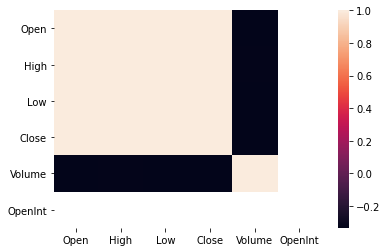

In [54]:
sns.heatmap(df.corr())
plt.show()

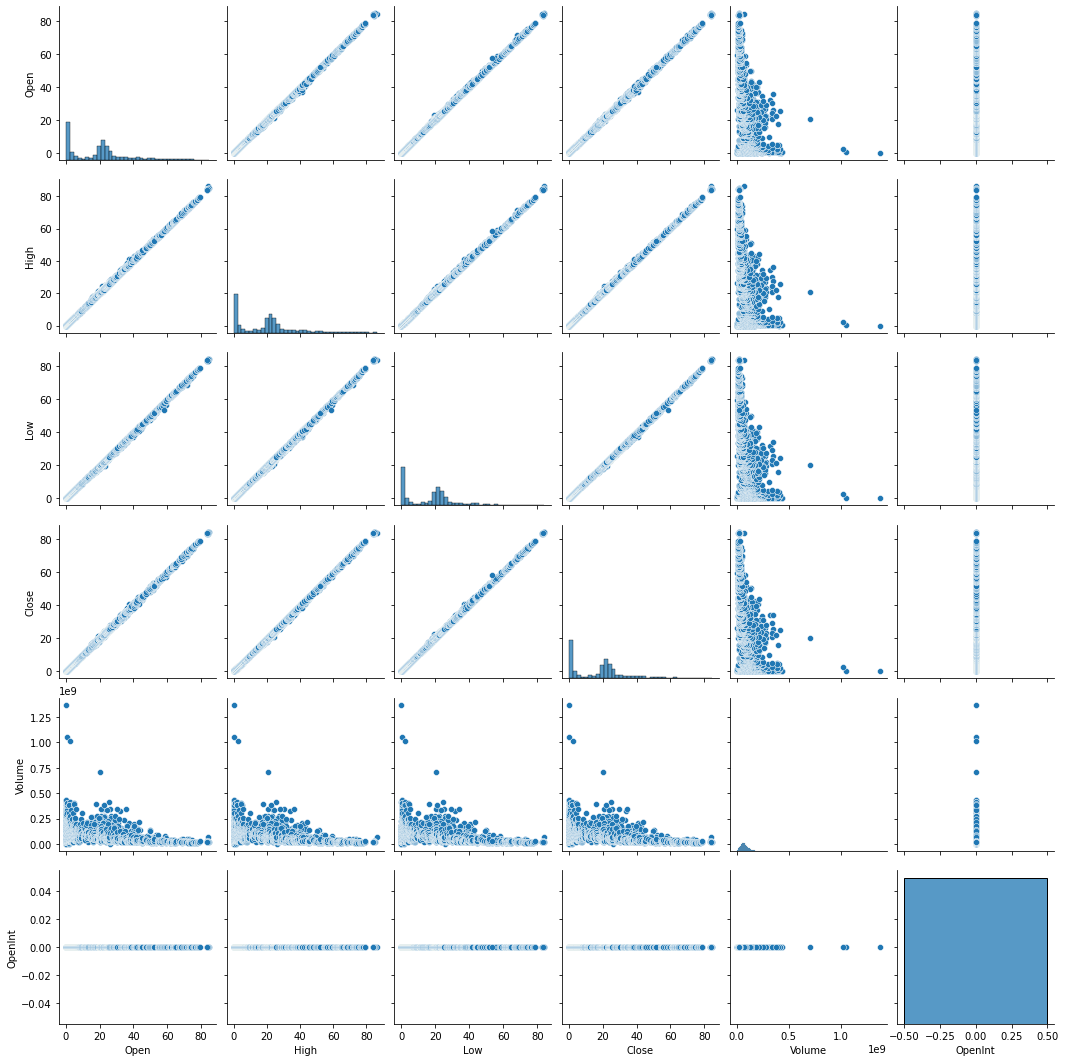

In [55]:
sns.pairplot(df)
plt.show()

In [56]:
#Data is clean, no null values
#OpenInt is dead data, 0 in every row, REMOVE

In [57]:
data.drop(['OpenInt'], axis=1, inplace=True)

In [58]:
data.describe()

Open         High          Low        Close        Volume
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09

In [59]:
data

Date      Open      High       Low     Close      Volume
0     1986-03-13   0.06720   0.07533   0.06720   0.07533  1371330506
1     1986-03-14   0.07533   0.07533   0.07533   0.07533   409569463
2     1986-03-17   0.07533   0.07533   0.07533   0.07533   176995245
3     1986-03-18   0.07533   0.07533   0.07533   0.07533    90067008
4     1986-03-19   0.07533   0.07533   0.07533   0.07533    63655515
...          ...       ...       ...       ...       ...         ...
7978  2017-11-06  84.20000  84.70000  84.08250  84.47000    19852151
7979  2017-11-07  84.77000  84.90000  83.93000  84.26000    17927878
7980  2017-11-08  84.14000  84.61000  83.83000  84.56000    18029584
7981  2017-11-09  84.11000  84.27000  82.90000  84.09000    21175384
7982  2017-11-10  83.79000  84.09500  83.23000  83.87000    19396301

[7983 rows x 6 columns]

In [60]:
#OpenInt Removed succesfully

In [61]:
#Add Calculated Feilds:
#DailyVolitility
#DayPriceChange
#WeekPriceChange
#MonthPriceChange
#6MonthPriceChange
#YearPriceChange
#3yearPriceChange

In [62]:
#Daily Price Volitility
#Mesured by the % difference the max is from the min represented in decimal format
#Max = 2
#Min = 3
#((min/max)-1)*-1
index = 0
dailyVolitility = [0.0] * len(data.index)

while (index < len(data)):
    #if(dfNYA.iloc[index, 3] == None or dfNYA.iloc[index, 4] == None):
     #   print("Missing Min or Max")
    #else:
    dailyVolitility[index] = (((data.iloc[index, 3]/data.iloc[index, 2])-1)*-1)
    #print(index)
    index += 1
    
data['DayVolitility'] = dailyVolitility

In [63]:
#Check Daily Price Volitility
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  
count    7983.000000  
mean        0.025434  
std         0.017461  
min        -0.000000  
25%         0.014243  
50%         0.021715  
75%         0.031311  
max         0.300080

In [64]:
#Daily Price Change
#Mesured by the % difference the close is from the previous day open represented in decimal format
#Close = 4
index = 1
dailyChange = [0.0] * len(data.index)

while (index < len(data)):
    if(data.iloc[index, 4] == None or data.iloc[(index -1), 4] == None):
        print("Missing Open or Close")
        dailyChange[index] = None
    else:
        dailyChange[index] = (data.iloc[index, 4]/data.iloc[(index-1), 4]) - 1
        #print(dailyChange[index])
    
    index += 1
    
data['DayPriceChange'] = dailyChange

In [65]:
#Check Daily Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  
count    7983.000000     7983.000000  
mean        0.025434        0.001142  
std         0.017461        0.022890  
min        -0.000000       -0.300080  
25%         0.014243       -0.008923  
50%         0.021715        0.000000  
75%         0.031311        0.010833  
max         0.300080        0.195347

In [66]:
#Weekly Price Change
#add calculated Price Change for (decimal) price difference 1 week into the past. +.01 is +1%
#Close = 4
#Date = 0
nextValue = 1
index = 0
pastWeekChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-7 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        pastWeekChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        pastWeekChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['WkPriceChange'] = pastWeekChange

Missing Data
1986-03-13 From 1986-03-06
Missing Data
1986-03-14 From 1986-03-07
Missing Data
1986-03-17 From 1986-03-10
Missing Data
1986-03-18 From 1986-03-11
Missing Data
1986-03-19 From 1986-03-12
Missing Data
1986-04-04 From 1986-03-28
Missing Data
1986-06-02 From 1986-05-26
Missing Data
1986-07-11 From 1986-07-04
Missing Data
1986-09-08 From 1986-09-01
Missing Data
1986-12-04 From 1986-11-27
Missing Data
1987-01-08 From 1987-01-01
Missing Data
1987-02-23 From 1987-02-16
Missing Data
1987-04-24 From 1987-04-17
Missing Data
1987-06-01 From 1987-05-25
Missing Data
1987-07-10 From 1987-07-03
Missing Data
1987-09-14 From 1987-09-07
Missing Data
1987-12-03 From 1987-11-26
Missing Data
1988-01-08 From 1988-01-01
Missing Data
1988-02-22 From 1988-02-15
Missing Data
1988-04-08 From 1988-04-01
Missing Data
1988-06-06 From 1988-05-30
Missing Data
1988-07-11 From 1988-07-04
Missing Data
1988-09-12 From 1988-09-05
Missing Data
1988-12-01 From 1988-11-24
Missing Data
1989-01-09 From 1989-01-02


Missing Data
2011-07-11 From 2011-07-04
Missing Data
2011-09-12 From 2011-09-05
Missing Data
2011-12-01 From 2011-11-24
Missing Data
2012-01-09 From 2012-01-02
Missing Data
2012-01-23 From 2012-01-16
Missing Data
2012-02-27 From 2012-02-20
Missing Data
2012-04-13 From 2012-04-06
Missing Data
2012-06-04 From 2012-05-28
Missing Data
2012-07-11 From 2012-07-04
Missing Data
2012-09-10 From 2012-09-03
Missing Data
2012-11-05 From 2012-10-29
Missing Data
2012-11-06 From 2012-10-30
Missing Data
2012-11-29 From 2012-11-22
Missing Data
2013-01-08 From 2013-01-01
Missing Data
2013-01-28 From 2013-01-21
Missing Data
2013-02-25 From 2013-02-18
Missing Data
2013-04-05 From 2013-03-29
Missing Data
2013-06-03 From 2013-05-27
Missing Data
2013-07-11 From 2013-07-04
Missing Data
2013-09-09 From 2013-09-02
Missing Data
2013-12-05 From 2013-11-28
Missing Data
2014-01-08 From 2014-01-01
Missing Data
2014-01-27 From 2014-01-20
Missing Data
2014-02-24 From 2014-02-17
Missing Data
2014-04-25 From 2014-04-18


In [67]:
#Check Weekly Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  
count    7983.000000     7983.000000    7726.000000  
mean        0.025434        0.001142       0.005382  
std         0.017461        0.022890       0.047048  
min        -0.000000       -0.300080      -0.377654  
25%         0.014243       -0.008923      -0.019414  
50%         0.021715        0.000000       0.002400  
75%         0.031311        0.010833       0.028535  
max         0.300080        0.195347       0.292267

In [68]:
#Monthly Price Change
#add calculated Price Change for (decimal) price difference 28 days into the past. +.01 is +1%
#months are considered 28 days since it's divisible by 7, producing less invalid data
#Close = 4
#Date = 0
nextValue = 1
index = 0
pastMonthChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    #Construct price change at close 28 days in the past
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-28 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        pastMonthChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        pastMonthChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['MthPriceChange'] = pastMonthChange

Missing Data
1986-03-13 From 1986-02-13
Missing Data
1986-03-14 From 1986-02-14
Missing Data
1986-03-17 From 1986-02-17
Missing Data
1986-03-18 From 1986-02-18
Missing Data
1986-03-19 From 1986-02-19
Missing Data
1986-03-20 From 1986-02-20
Missing Data
1986-03-21 From 1986-02-21
Missing Data
1986-03-24 From 1986-02-24
Missing Data
1986-03-25 From 1986-02-25
Missing Data
1986-03-26 From 1986-02-26
Missing Data
1986-03-27 From 1986-02-27
Missing Data
1986-03-31 From 1986-03-03
Missing Data
1986-04-01 From 1986-03-04
Missing Data
1986-04-02 From 1986-03-05
Missing Data
1986-04-03 From 1986-03-06
Missing Data
1986-04-04 From 1986-03-07
Missing Data
1986-04-07 From 1986-03-10
Missing Data
1986-04-08 From 1986-03-11
Missing Data
1986-04-09 From 1986-03-12
Missing Data
1986-04-25 From 1986-03-28
Missing Data
1986-06-23 From 1986-05-26
Missing Data
1986-08-01 From 1986-07-04
Missing Data
1986-09-29 From 1986-09-01
Missing Data
1987-01-22 From 1986-12-25
Missing Data
1987-01-29 From 1987-01-01


Missing Data
2008-09-29 From 2008-09-01
Missing Data
2009-01-22 From 2008-12-25
Missing Data
2009-01-29 From 2009-01-01
Missing Data
2009-03-16 From 2009-02-16
Missing Data
2009-05-08 From 2009-04-10
Missing Data
2009-06-22 From 2009-05-25
Missing Data
2009-07-31 From 2009-07-03
Missing Data
2009-10-05 From 2009-09-07
Missing Data
2009-12-24 From 2009-11-26
Missing Data
2010-01-22 From 2009-12-25
Missing Data
2010-01-29 From 2010-01-01
Missing Data
2010-03-15 From 2010-02-15
Missing Data
2010-04-30 From 2010-04-02
Missing Data
2010-06-28 From 2010-05-31
Missing Data
2010-08-02 From 2010-07-05
Missing Data
2010-10-04 From 2010-09-06
Missing Data
2010-12-23 From 2010-11-25
Missing Data
2011-01-21 From 2010-12-24
Missing Data
2011-02-14 From 2011-01-17
Missing Data
2011-03-21 From 2011-02-21
Missing Data
2011-05-20 From 2011-04-22
Missing Data
2011-06-27 From 2011-05-30
Missing Data
2011-08-01 From 2011-07-04
Missing Data
2011-10-03 From 2011-09-05
Missing Data
2011-12-22 From 2011-11-24


In [69]:
#Check Monthly Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  
count    7983.000000     7983.000000    7726.000000     7703.000000  
mean        0.025434        0.001142       0.005382        0.021439  
std         0.017461        0.022890       0.047048        0.091930  
min        -0.000000       -0.300080      -0.377654       -0.400256  
25%         0.014243       -0.008923      -0.019414       -0.031600  
50%         0.021715        0.000000       0.002400        0.017464  
75%         0.031311        0.010833       0.028535        0.068074  
max         0.300080        0.195347       0.292267        0.534623

In [70]:
#6-Month Price Change
#add calculated Price Change for (decimal) price difference 183 days into the past. +.01 is +1%
#182 days since it's divisible by 7, less missing data from absent weekend entries
#this is off from the actual half year by .525 days, but it is insignificant in this application
#Close = 4
#Date = 0
nextValue = 1
index = 0
past6MonthChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    #Construct price change at close 182 days in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-182 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        past6MonthChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        past6MonthChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['SixMthPriceChange'] = past6MonthChange

Missing Data
1986-03-13 From 1985-09-12
Missing Data
1986-03-14 From 1985-09-13
Missing Data
1986-03-17 From 1985-09-16
Missing Data
1986-03-18 From 1985-09-17
Missing Data
1986-03-19 From 1985-09-18
Missing Data
1986-03-20 From 1985-09-19
Missing Data
1986-03-21 From 1985-09-20
Missing Data
1986-03-24 From 1985-09-23
Missing Data
1986-03-25 From 1985-09-24
Missing Data
1986-03-26 From 1985-09-25
Missing Data
1986-03-27 From 1985-09-26
Missing Data
1986-03-31 From 1985-09-30
Missing Data
1986-04-01 From 1985-10-01
Missing Data
1986-04-02 From 1985-10-02
Missing Data
1986-04-03 From 1985-10-03
Missing Data
1986-04-04 From 1985-10-04
Missing Data
1986-04-07 From 1985-10-07
Missing Data
1986-04-08 From 1985-10-08
Missing Data
1986-04-09 From 1985-10-09
Missing Data
1986-04-10 From 1985-10-10
Missing Data
1986-04-11 From 1985-10-11
Missing Data
1986-04-14 From 1985-10-14
Missing Data
1986-04-15 From 1985-10-15
Missing Data
1986-04-16 From 1985-10-16
Missing Data
1986-04-17 From 1985-10-17


Missing Data
1997-03-03 From 1996-09-02
Missing Data
1997-05-29 From 1996-11-28
Missing Data
1997-06-25 From 1996-12-25
Missing Data
1997-07-02 From 1997-01-01
Missing Data
1997-08-18 From 1997-02-17
Missing Data
1997-09-26 From 1997-03-28
Missing Data
1997-11-24 From 1997-05-26
Missing Data
1998-01-02 From 1997-07-04
Missing Data
1998-03-02 From 1997-09-01
Missing Data
1998-05-28 From 1997-11-27
Missing Data
1998-06-25 From 1997-12-25
Missing Data
1998-07-02 From 1998-01-01
Missing Data
1998-07-20 From 1998-01-19
Missing Data
1998-08-17 From 1998-02-16
Missing Data
1998-10-09 From 1998-04-10
Missing Data
1998-11-23 From 1998-05-25
Missing Data
1999-03-08 From 1998-09-07
Missing Data
1999-04-29 From 1998-10-29
Missing Data
1999-05-27 From 1998-11-26
Missing Data
1999-06-25 From 1998-12-25
Missing Data
1999-07-02 From 1999-01-01
Missing Data
1999-07-19 From 1999-01-18
Missing Data
1999-08-16 From 1999-02-15
Missing Data
1999-10-01 From 1999-04-02
Missing Data
1999-11-29 From 1999-05-31


In [71]:
#Check 6-Month Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    7983.000000     7983.000000    7726.000000     7703.000000   
mean        0.025434        0.001142       0.005382        0.021439   
std         0.017461        0.022890       0.047048        0.091930   
min        -0.000000       -0.300080      -0.377654       -0.400256   
25%         0.014243       -0.008923      -0.019414       -0.031600   
50%         0.021715        0.000000       0.002400        0.017464   
75%         0.031311        0.010833       0.028535        0.068074   
max         0.300080        0.195347       0.292267        0.534623   

       SixMthPriceChange  
count        7592.000000  
mean            0.146373  
std             0.292387  
min            -0.485587  
25%            -0.022150  
50%             0.102881  
75%             0.249955  
max             2.451878

In [72]:
#year Price Change
#add calculated Price Change for (decimal) price difference 364 days into the past. +.01 is +1%
#364 days since it's divisible by 7, less missing data from absent weekend entries
#Close = 4
#Date = 0
nextValue = 1
index = 0
pastYearChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-364 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        pastYearChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        pastYearChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['YrPriceChange'] = pastYearChange

Missing Data
1986-03-13 From 1985-03-14
Missing Data
1986-03-14 From 1985-03-15
Missing Data
1986-03-17 From 1985-03-18
Missing Data
1986-03-18 From 1985-03-19
Missing Data
1986-03-19 From 1985-03-20
Missing Data
1986-03-20 From 1985-03-21
Missing Data
1986-03-21 From 1985-03-22
Missing Data
1986-03-24 From 1985-03-25
Missing Data
1986-03-25 From 1985-03-26
Missing Data
1986-03-26 From 1985-03-27
Missing Data
1986-03-27 From 1985-03-28
Missing Data
1986-03-31 From 1985-04-01
Missing Data
1986-04-01 From 1985-04-02
Missing Data
1986-04-02 From 1985-04-03
Missing Data
1986-04-03 From 1985-04-04
Missing Data
1986-04-04 From 1985-04-05
Missing Data
1986-04-07 From 1985-04-08
Missing Data
1986-04-08 From 1985-04-09
Missing Data
1986-04-09 From 1985-04-10
Missing Data
1986-04-10 From 1985-04-11
Missing Data
1986-04-11 From 1985-04-12
Missing Data
1986-04-14 From 1985-04-15
Missing Data
1986-04-15 From 1985-04-16
Missing Data
1986-04-16 From 1985-04-17
Missing Data
1986-04-17 From 1985-04-18


Missing Data
1987-01-06 From 1986-01-07
Missing Data
1987-01-07 From 1986-01-08
Missing Data
1987-01-08 From 1986-01-09
Missing Data
1987-01-09 From 1986-01-10
Missing Data
1987-01-12 From 1986-01-13
Missing Data
1987-01-13 From 1986-01-14
Missing Data
1987-01-14 From 1986-01-15
Missing Data
1987-01-15 From 1986-01-16
Missing Data
1987-01-16 From 1986-01-17
Missing Data
1987-01-19 From 1986-01-20
Missing Data
1987-01-20 From 1986-01-21
Missing Data
1987-01-21 From 1986-01-22
Missing Data
1987-01-22 From 1986-01-23
Missing Data
1987-01-23 From 1986-01-24
Missing Data
1987-01-26 From 1986-01-27
Missing Data
1987-01-27 From 1986-01-28
Missing Data
1987-01-28 From 1986-01-29
Missing Data
1987-01-29 From 1986-01-30
Missing Data
1987-01-30 From 1986-01-31
Missing Data
1987-02-02 From 1986-02-03
Missing Data
1987-02-03 From 1986-02-04
Missing Data
1987-02-04 From 1986-02-05
Missing Data
1987-02-05 From 1986-02-06
Missing Data
1987-02-06 From 1986-02-07
Missing Data
1987-02-09 From 1986-02-10


In [73]:
#Check Year Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    7983.000000     7983.000000    7726.000000     7703.000000   
mean        0.025434        0.001142       0.005382        0.021439   
std         0.017461        0.022890       0.047048        0.091930   
min        -0.000000       -0.300080      -0.377654       -0.400256   
25%         0.014243       -0.008923      -0.019414       -0.031600   
50%         0.021715        0.000000       0.002400        0.017464   
75%         0.031311        0.010833       0.028535        0.068074   
max         0.300080        0.195347       0.292267        0.534623   

       SixMthPriceChange  YrPriceChange  
count        7592.000000    7593.000000  
mean            0.146373       0.314647  
std             0.292387       0.512763  
min            -0.485587      -0.646927  
25%            -0.022150      -0.005819  
50%             0.102881       0.175516  
75%             0.249955       0.521076  
max             2.451878       4.009027

In [74]:
#2year Price Change
#add calculated Price Change for (decimal) price difference 728 days into the past. +.01 is +1%
#728 days since it's divisible by 7, less missing data from absent weekend entries
#Close = 4
#Date = 0
nextValue = 1
index = 0
past2YearChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-728 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        past2YearChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        past2YearChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['TwoYrPriceChange'] = past2YearChange

Missing Data
1986-03-13 From 1984-03-15
Missing Data
1986-03-14 From 1984-03-16
Missing Data
1986-03-17 From 1984-03-19
Missing Data
1986-03-18 From 1984-03-20
Missing Data
1986-03-19 From 1984-03-21
Missing Data
1986-03-20 From 1984-03-22
Missing Data
1986-03-21 From 1984-03-23
Missing Data
1986-03-24 From 1984-03-26
Missing Data
1986-03-25 From 1984-03-27
Missing Data
1986-03-26 From 1984-03-28
Missing Data
1986-03-27 From 1984-03-29
Missing Data
1986-03-31 From 1984-04-02
Missing Data
1986-04-01 From 1984-04-03
Missing Data
1986-04-02 From 1984-04-04
Missing Data
1986-04-03 From 1984-04-05
Missing Data
1986-04-04 From 1984-04-06
Missing Data
1986-04-07 From 1984-04-09
Missing Data
1986-04-08 From 1984-04-10
Missing Data
1986-04-09 From 1984-04-11
Missing Data
1986-04-10 From 1984-04-12
Missing Data
1986-04-11 From 1984-04-13
Missing Data
1986-04-14 From 1984-04-16
Missing Data
1986-04-15 From 1984-04-17
Missing Data
1986-04-16 From 1984-04-18
Missing Data
1986-04-17 From 1984-04-19


Missing Data
1987-01-05 From 1985-01-07
Missing Data
1987-01-06 From 1985-01-08
Missing Data
1987-01-07 From 1985-01-09
Missing Data
1987-01-08 From 1985-01-10
Missing Data
1987-01-09 From 1985-01-11
Missing Data
1987-01-12 From 1985-01-14
Missing Data
1987-01-13 From 1985-01-15
Missing Data
1987-01-14 From 1985-01-16
Missing Data
1987-01-15 From 1985-01-17
Missing Data
1987-01-16 From 1985-01-18
Missing Data
1987-01-19 From 1985-01-21
Missing Data
1987-01-20 From 1985-01-22
Missing Data
1987-01-21 From 1985-01-23
Missing Data
1987-01-22 From 1985-01-24
Missing Data
1987-01-23 From 1985-01-25
Missing Data
1987-01-26 From 1985-01-28
Missing Data
1987-01-27 From 1985-01-29
Missing Data
1987-01-28 From 1985-01-30
Missing Data
1987-01-29 From 1985-01-31
Missing Data
1987-01-30 From 1985-02-01
Missing Data
1987-02-02 From 1985-02-04
Missing Data
1987-02-03 From 1985-02-05
Missing Data
1987-02-04 From 1985-02-06
Missing Data
1987-02-05 From 1985-02-07
Missing Data
1987-02-06 From 1985-02-08


Missing Data
1987-10-27 From 1985-10-29
Missing Data
1987-10-28 From 1985-10-30
Missing Data
1987-10-29 From 1985-10-31
Missing Data
1987-10-30 From 1985-11-01
Missing Data
1987-11-02 From 1985-11-04
Missing Data
1987-11-03 From 1985-11-05
Missing Data
1987-11-04 From 1985-11-06
Missing Data
1987-11-05 From 1985-11-07
Missing Data
1987-11-06 From 1985-11-08
Missing Data
1987-11-09 From 1985-11-11
Missing Data
1987-11-10 From 1985-11-12
Missing Data
1987-11-11 From 1985-11-13
Missing Data
1987-11-12 From 1985-11-14
Missing Data
1987-11-13 From 1985-11-15
Missing Data
1987-11-16 From 1985-11-18
Missing Data
1987-11-17 From 1985-11-19
Missing Data
1987-11-18 From 1985-11-20
Missing Data
1987-11-19 From 1985-11-21
Missing Data
1987-11-20 From 1985-11-22
Missing Data
1987-11-23 From 1985-11-25
Missing Data
1987-11-24 From 1985-11-26
Missing Data
1987-11-25 From 1985-11-27
Missing Data
1987-11-27 From 1985-11-29
Missing Data
1987-11-30 From 1985-12-02
Missing Data
1987-12-01 From 1985-12-03


Missing Data
2007-03-23 From 2005-03-25
Missing Data
2007-07-02 From 2005-07-04
Missing Data
2007-12-24 From 2005-12-26
Missing Data
2007-12-31 From 2006-01-02
Missing Data
2008-01-14 From 2006-01-16
Missing Data
2008-04-11 From 2006-04-14
Missing Data
2008-07-01 From 2006-07-04
Missing Data
2008-11-20 From 2006-11-23
Missing Data
2008-12-22 From 2006-12-25
Missing Data
2008-12-29 From 2007-01-01
Missing Data
2008-12-30 From 2007-01-02
Missing Data
2009-01-12 From 2007-01-15
Missing Data
2009-04-03 From 2007-04-06
Missing Data
2009-07-01 From 2007-07-04
Missing Data
2009-08-31 From 2007-09-03
Missing Data
2009-11-19 From 2007-11-22
Missing Data
2009-12-22 From 2007-12-25
Missing Data
2009-12-29 From 2008-01-01
Missing Data
2010-03-19 From 2008-03-21
Missing Data
2010-05-24 From 2008-05-26
Missing Data
2010-07-02 From 2008-07-04
Missing Data
2010-08-30 From 2008-09-01
Missing Data
2010-12-23 From 2008-12-25
Missing Data
2010-12-30 From 2009-01-01
Missing Data
2011-02-14 From 2009-02-16


In [75]:
#Check 2 Year Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    7983.000000     7983.000000    7726.000000     7703.000000   
mean        0.025434        0.001142       0.005382        0.021439   
std         0.017461        0.022890       0.047048        0.091930   
min        -0.000000       -0.300080      -0.377654       -0.400256   
25%         0.014243       -0.008923      -0.019414       -0.031600   
50%         0.021715        0.000000       0.002400        0.017464   
75%         0.031311        0.010833       0.028535        0.068074   
max         0.300080        0.195347       0.292267        0.534623   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  
count        7592.000000    7593.000000       7304.000000  
mean            0.146373       0.314647          0.687783  
std             0.292387       0.512763          0.897729  
min            -0.485587      -0.646927         -0.458644  
25%            -0.022150      -0.005819          0.055309  
50%             0.102881       0.175516          0.360344  
75%             0.249955       0.521076          1.264569  
max             2.451878       4.009027          4.365030

In [76]:
#add calculated Price Change for (decimal) price difference 1 week into the future. +.01 is +1% gained by next week
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureWeekChange = [0.0] * len(data.index)
missingWkChange = 0;

while nextValue == 1 and index <= (len(data) - 7):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('7 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingWkChange += 1
        futureWeekChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureWeekChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutWkPriceChange'] = futureWeekChange

Missing Data
1986-03-28 From 1986-03-21
Missing Data
1986-05-26 From 1986-05-19
Missing Data
1986-07-04 From 1986-06-27
Missing Data
1986-09-01 From 1986-08-25
Missing Data
1986-11-27 From 1986-11-20
Missing Data
1986-12-25 From 1986-12-18
Missing Data
1987-02-16 From 1987-02-09
Missing Data
1987-04-17 From 1987-04-10
Missing Data
1987-05-25 From 1987-05-18
Missing Data
1987-07-03 From 1987-06-26
Missing Data
1987-09-07 From 1987-08-31
Missing Data
1987-11-26 From 1987-11-19
Missing Data
1987-12-25 From 1987-12-18
Missing Data
1988-02-15 From 1988-02-08
Missing Data
1988-04-01 From 1988-03-25
Missing Data
1988-05-30 From 1988-05-23
Missing Data
1988-07-04 From 1988-06-27
Missing Data
1988-09-05 From 1988-08-29
Missing Data
1988-11-24 From 1988-11-17
Missing Data
1988-12-26 From 1988-12-19
Missing Data
1989-02-20 From 1989-02-13
Missing Data
1989-03-24 From 1989-03-17
Missing Data
1989-05-29 From 1989-05-22
Missing Data
1989-07-04 From 1989-06-27
Missing Data
1989-09-04 From 1989-08-28


Missing Data
2012-02-20 From 2012-02-13
Missing Data
2012-04-06 From 2012-03-30
Missing Data
2012-05-28 From 2012-05-21
Missing Data
2012-07-04 From 2012-06-27
Missing Data
2012-09-03 From 2012-08-27
Missing Data
2012-10-29 From 2012-10-22
Missing Data
2012-10-30 From 2012-10-23
Missing Data
2012-11-22 From 2012-11-15
Missing Data
2012-12-25 From 2012-12-18
Missing Data
2013-01-21 From 2013-01-14
Missing Data
2013-02-18 From 2013-02-11
Missing Data
2013-03-29 From 2013-03-22
Missing Data
2013-05-27 From 2013-05-20
Missing Data
2013-07-04 From 2013-06-27
Missing Data
2013-09-02 From 2013-08-26
Missing Data
2013-11-28 From 2013-11-21
Missing Data
2013-12-25 From 2013-12-18
Missing Data
2014-01-20 From 2014-01-13
Missing Data
2014-02-17 From 2014-02-10
Missing Data
2014-04-18 From 2014-04-11
Missing Data
2014-05-26 From 2014-05-19
Missing Data
2014-07-04 From 2014-06-27
Missing Data
2014-09-01 From 2014-08-25
Missing Data
2014-11-27 From 2014-11-20
Missing Data
2014-12-25 From 2014-12-18


In [77]:
#Check Future Week Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    7983.000000     7983.000000    7726.000000     7703.000000   
mean        0.025434        0.001142       0.005382        0.021439   
std         0.017461        0.022890       0.047048        0.091930   
min        -0.000000       -0.300080      -0.377654       -0.400256   
25%         0.014243       -0.008923      -0.019414       -0.031600   
50%         0.021715        0.000000       0.002400        0.017464   
75%         0.031311        0.010833       0.028535        0.068074   
max         0.300080        0.195347       0.292267        0.534623   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  
count        7592.000000    7593.000000       7304.000000       7731.000000  
mean            0.146373       0.314647          0.687783          0.005379  
std             0.292387       0.512763          0.897729          0.047033  
min            -0.485587      -0.646927         -0.458644         -0.377654  
25%            -0.022150      -0.005819          0.055309         -0.019382  
50%             0.102881       0.175516          0.360344          0.002378  
75%             0.249955       0.521076          1.264569          0.028520  
max             2.451878       4.009027          4.365030          0.292267

In [78]:
#add calculated Price Change for (decimal) price difference 1 month into the future. +.01 is +1% gained
#Month = 28 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureMonthChange = [0.0] * len(data.index)
missingMonthChange = 0;

while nextValue == 1 and index <= (len(data) - 28):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('28 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingMonthChange += 1
        futureMonthChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureMonthChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutMthPriceChange'] = futureMonthChange

Missing Data
1986-05-26 From 1986-04-28
Missing Data
1986-07-04 From 1986-06-06
Missing Data
1986-09-01 From 1986-08-04
Missing Data
1986-11-27 From 1986-10-30
Missing Data
1987-01-01 From 1986-12-04
Missing Data
1987-02-16 From 1987-01-19
Missing Data
1987-04-17 From 1987-03-20
Missing Data
1987-05-25 From 1987-04-27
Missing Data
1987-07-03 From 1987-06-05
Missing Data
1987-09-07 From 1987-08-10
Missing Data
1987-11-26 From 1987-10-29
Missing Data
1987-12-25 From 1987-11-27
Missing Data
1988-01-01 From 1987-12-04
Missing Data
1988-02-15 From 1988-01-18
Missing Data
1988-04-01 From 1988-03-04
Missing Data
1988-05-30 From 1988-05-02
Missing Data
1988-07-04 From 1988-06-06
Missing Data
1988-09-05 From 1988-08-08
Missing Data
1988-11-24 From 1988-10-27
Missing Data
1988-12-26 From 1988-11-28
Missing Data
1989-01-02 From 1988-12-05
Missing Data
1989-02-20 From 1989-01-23
Missing Data
1989-03-24 From 1989-02-24
Missing Data
1989-05-29 From 1989-05-01
Missing Data
1989-07-04 From 1989-06-06


Missing Data
2011-04-22 From 2011-03-25
Missing Data
2011-05-30 From 2011-05-02
Missing Data
2011-07-04 From 2011-06-06
Missing Data
2011-09-05 From 2011-08-08
Missing Data
2011-11-24 From 2011-10-27
Missing Data
2011-12-26 From 2011-11-28
Missing Data
2012-01-02 From 2011-12-05
Missing Data
2012-01-16 From 2011-12-19
Missing Data
2012-02-20 From 2012-01-23
Missing Data
2012-04-06 From 2012-03-09
Missing Data
2012-05-28 From 2012-04-30
Missing Data
2012-07-04 From 2012-06-06
Missing Data
2012-09-03 From 2012-08-06
Missing Data
2012-10-29 From 2012-10-01
Missing Data
2012-10-30 From 2012-10-02
Missing Data
2012-11-22 From 2012-10-25
Missing Data
2012-12-25 From 2012-11-27
Missing Data
2013-01-01 From 2012-12-04
Missing Data
2013-01-21 From 2012-12-24
Missing Data
2013-03-29 From 2013-03-01
Missing Data
2013-05-27 From 2013-04-29
Missing Data
2013-07-04 From 2013-06-06
Missing Data
2013-09-02 From 2013-08-05
Missing Data
2013-11-28 From 2013-10-31
Missing Data
2013-12-25 From 2013-11-27


In [79]:
#Check Future Month Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    7983.000000     7983.000000    7726.000000     7703.000000   
mean        0.025434        0.001142       0.005382        0.021439   
std         0.017461        0.022890       0.047048        0.091930   
min        -0.000000       -0.300080      -0.377654       -0.400256   
25%         0.014243       -0.008923      -0.019414       -0.031600   
50%         0.021715        0.000000       0.002400        0.017464   
75%         0.031311        0.010833       0.028535        0.068074   
max         0.300080        0.195347       0.292267        0.534623   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
count        7592.000000    7593.000000       7304.000000       7731.000000   
mean            0.146373       0.314647          0.687783          0.005379   
std             0.292387       0.512763          0.897729          0.047033   
min            -0.485587      -0.646927         -0.458644         -0.377654   
25%            -0.022150      -0.005819          0.055309         -0.019382   
50%             0.102881       0.175516          0.360344          0.002378   
75%             0.249955       0.521076          1.264569          0.028520   
max             2.451878       4.009027          4.365030          0.292267   

       FutMthPriceChange  
count        7723.000000  
mean            0.021292  
std             0.091788  
min            -0.400256  
25%            -0.031485  
50%             0.017064  
75%             0.067573  
max             0.534623

In [80]:
#add calculated Price Change for (decimal) price difference 6 months into the future. +.01 is +1% gained 
#6Month = 183 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
future6MonthChange = [0.0] * len(data.index)
missing6MonthChange = 0;

while nextValue == 1 and index <= (len(data) - 183):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('183 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missing6MonthChange += 1
        future6MonthChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        future6MonthChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutSixMthPriceChange'] = future6MonthChange

Missing Data
1986-09-13 From 1986-03-14
Missing Data
1986-09-20 From 1986-03-21
Missing Data
1986-10-04 From 1986-04-04
Missing Data
1986-10-11 From 1986-04-11
Missing Data
1986-10-18 From 1986-04-18
Missing Data
1986-10-25 From 1986-04-25
Missing Data
1986-11-01 From 1986-05-02
Missing Data
1986-11-08 From 1986-05-09
Missing Data
1986-11-15 From 1986-05-16
Missing Data
1986-11-22 From 1986-05-23
Missing Data
1986-11-27 From 1986-05-28
Missing Data
1986-11-29 From 1986-05-30
Missing Data
1986-12-06 From 1986-06-06
Missing Data
1986-12-13 From 1986-06-13
Missing Data
1986-12-20 From 1986-06-20
Missing Data
1986-12-25 From 1986-06-25
Missing Data
1986-12-27 From 1986-06-27
Missing Data
1987-01-01 From 1986-07-02
Missing Data
1987-01-10 From 1986-07-11
Missing Data
1987-01-17 From 1986-07-18
Missing Data
1987-01-24 From 1986-07-25
Missing Data
1987-01-31 From 1986-08-01
Missing Data
1987-02-07 From 1986-08-08
Missing Data
1987-02-14 From 1986-08-15
Missing Data
1987-02-21 From 1986-08-22


Missing Data
1990-07-14 From 1990-01-12
Missing Data
1990-07-21 From 1990-01-19
Missing Data
1990-07-28 From 1990-01-26
Missing Data
1990-08-04 From 1990-02-02
Missing Data
1990-08-11 From 1990-02-09
Missing Data
1990-08-18 From 1990-02-16
Missing Data
1990-08-25 From 1990-02-23
Missing Data
1990-09-01 From 1990-03-02
Missing Data
1990-09-08 From 1990-03-09
Missing Data
1990-09-15 From 1990-03-16
Missing Data
1990-09-22 From 1990-03-23
Missing Data
1990-09-29 From 1990-03-30
Missing Data
1990-10-06 From 1990-04-06
Missing Data
1990-10-20 From 1990-04-20
Missing Data
1990-10-27 From 1990-04-27
Missing Data
1990-11-03 From 1990-05-04
Missing Data
1990-11-10 From 1990-05-11
Missing Data
1990-11-17 From 1990-05-18
Missing Data
1990-11-22 From 1990-05-23
Missing Data
1990-11-24 From 1990-05-25
Missing Data
1990-12-01 From 1990-06-01
Missing Data
1990-12-08 From 1990-06-08
Missing Data
1990-12-15 From 1990-06-15
Missing Data
1990-12-22 From 1990-06-22
Missing Data
1990-12-25 From 1990-06-25


Missing Data
1994-04-09 From 1993-10-08
Missing Data
1994-04-16 From 1993-10-15
Missing Data
1994-04-23 From 1993-10-22
Missing Data
1994-04-27 From 1993-10-26
Missing Data
1994-04-30 From 1993-10-29
Missing Data
1994-05-07 From 1993-11-05
Missing Data
1994-05-14 From 1993-11-12
Missing Data
1994-05-21 From 1993-11-19
Missing Data
1994-05-28 From 1993-11-26
Missing Data
1994-06-04 From 1993-12-03
Missing Data
1994-06-11 From 1993-12-10
Missing Data
1994-06-18 From 1993-12-17
Missing Data
1994-07-02 From 1993-12-31
Missing Data
1994-07-09 From 1994-01-07
Missing Data
1994-07-16 From 1994-01-14
Missing Data
1994-07-23 From 1994-01-21
Missing Data
1994-07-30 From 1994-01-28
Missing Data
1994-08-06 From 1994-02-04
Missing Data
1994-08-13 From 1994-02-11
Missing Data
1994-08-20 From 1994-02-18
Missing Data
1994-08-27 From 1994-02-25
Missing Data
1994-09-03 From 1994-03-04
Missing Data
1994-09-10 From 1994-03-11
Missing Data
1994-09-17 From 1994-03-18
Missing Data
1994-09-24 From 1994-03-25


Missing Data
1998-01-17 From 1997-07-18
Missing Data
1998-01-24 From 1997-07-25
Missing Data
1998-01-31 From 1997-08-01
Missing Data
1998-02-07 From 1997-08-08
Missing Data
1998-02-14 From 1997-08-15
Missing Data
1998-02-21 From 1997-08-22
Missing Data
1998-02-28 From 1997-08-29
Missing Data
1998-03-07 From 1997-09-05
Missing Data
1998-03-14 From 1997-09-12
Missing Data
1998-03-21 From 1997-09-19
Missing Data
1998-03-28 From 1997-09-26
Missing Data
1998-04-04 From 1997-10-03
Missing Data
1998-04-10 From 1997-10-09
Missing Data
1998-04-11 From 1997-10-10
Missing Data
1998-04-18 From 1997-10-17
Missing Data
1998-04-25 From 1997-10-24
Missing Data
1998-05-02 From 1997-10-31
Missing Data
1998-05-09 From 1997-11-07
Missing Data
1998-05-16 From 1997-11-14
Missing Data
1998-05-23 From 1997-11-21
Missing Data
1998-05-30 From 1997-11-28
Missing Data
1998-06-06 From 1997-12-05
Missing Data
1998-06-13 From 1997-12-12
Missing Data
1998-06-20 From 1997-12-19
Missing Data
1998-06-27 From 1997-12-26


Missing Data
2001-10-06 From 2001-04-06
Missing Data
2001-10-20 From 2001-04-20
Missing Data
2001-10-27 From 2001-04-27
Missing Data
2001-11-03 From 2001-05-04
Missing Data
2001-11-10 From 2001-05-11
Missing Data
2001-11-17 From 2001-05-18
Missing Data
2001-11-22 From 2001-05-23
Missing Data
2001-11-24 From 2001-05-25
Missing Data
2001-12-01 From 2001-06-01
Missing Data
2001-12-08 From 2001-06-08
Missing Data
2001-12-15 From 2001-06-15
Missing Data
2001-12-22 From 2001-06-22
Missing Data
2001-12-25 From 2001-06-25
Missing Data
2001-12-29 From 2001-06-29
Missing Data
2002-01-01 From 2001-07-02
Missing Data
2002-01-05 From 2001-07-06
Missing Data
2002-01-12 From 2001-07-13
Missing Data
2002-01-19 From 2001-07-20
Missing Data
2002-01-26 From 2001-07-27
Missing Data
2002-02-02 From 2001-08-03
Missing Data
2002-02-09 From 2001-08-10
Missing Data
2002-02-16 From 2001-08-17
Missing Data
2002-02-23 From 2001-08-24
Missing Data
2002-03-02 From 2001-08-31
Missing Data
2002-03-09 From 2001-09-07


Missing Data
2005-07-02 From 2004-12-31
Missing Data
2005-07-09 From 2005-01-07
Missing Data
2005-07-16 From 2005-01-14
Missing Data
2005-07-23 From 2005-01-21
Missing Data
2005-07-30 From 2005-01-28
Missing Data
2005-08-06 From 2005-02-04
Missing Data
2005-08-13 From 2005-02-11
Missing Data
2005-08-20 From 2005-02-18
Missing Data
2005-08-27 From 2005-02-25
Missing Data
2005-09-03 From 2005-03-04
Missing Data
2005-09-10 From 2005-03-11
Missing Data
2005-09-17 From 2005-03-18
Missing Data
2005-10-01 From 2005-04-01
Missing Data
2005-10-08 From 2005-04-08
Missing Data
2005-10-15 From 2005-04-15
Missing Data
2005-10-22 From 2005-04-22
Missing Data
2005-10-29 From 2005-04-29
Missing Data
2005-11-05 From 2005-05-06
Missing Data
2005-11-12 From 2005-05-13
Missing Data
2005-11-19 From 2005-05-20
Missing Data
2005-11-24 From 2005-05-25
Missing Data
2005-11-26 From 2005-05-27
Missing Data
2005-12-03 From 2005-06-03
Missing Data
2005-12-10 From 2005-06-10
Missing Data
2005-12-17 From 2005-06-17


Missing Data
2009-04-10 From 2008-10-09
Missing Data
2009-04-11 From 2008-10-10
Missing Data
2009-04-18 From 2008-10-17
Missing Data
2009-04-25 From 2008-10-24
Missing Data
2009-05-02 From 2008-10-31
Missing Data
2009-05-09 From 2008-11-07
Missing Data
2009-05-16 From 2008-11-14
Missing Data
2009-05-23 From 2008-11-21
Missing Data
2009-05-30 From 2008-11-28
Missing Data
2009-06-06 From 2008-12-05
Missing Data
2009-06-13 From 2008-12-12
Missing Data
2009-06-20 From 2008-12-19
Missing Data
2009-06-27 From 2008-12-26
Missing Data
2009-07-04 From 2009-01-02
Missing Data
2009-07-11 From 2009-01-09
Missing Data
2009-07-18 From 2009-01-16
Missing Data
2009-07-25 From 2009-01-23
Missing Data
2009-08-01 From 2009-01-30
Missing Data
2009-08-08 From 2009-02-06
Missing Data
2009-08-15 From 2009-02-13
Missing Data
2009-08-22 From 2009-02-20
Missing Data
2009-08-29 From 2009-02-27
Missing Data
2009-09-05 From 2009-03-06
Missing Data
2009-09-12 From 2009-03-13
Missing Data
2009-09-19 From 2009-03-20


Missing Data
2013-01-26 From 2012-07-27
Missing Data
2013-02-02 From 2012-08-03
Missing Data
2013-02-09 From 2012-08-10
Missing Data
2013-02-16 From 2012-08-17
Missing Data
2013-02-23 From 2012-08-24
Missing Data
2013-03-02 From 2012-08-31
Missing Data
2013-03-09 From 2012-09-07
Missing Data
2013-03-16 From 2012-09-14
Missing Data
2013-03-23 From 2012-09-21
Missing Data
2013-03-29 From 2012-09-27
Missing Data
2013-03-30 From 2012-09-28
Missing Data
2013-04-06 From 2012-10-05
Missing Data
2013-04-13 From 2012-10-12
Missing Data
2013-04-20 From 2012-10-19
Missing Data
2013-04-27 From 2012-10-26
Missing Data
2013-05-04 From 2012-11-02
Missing Data
2013-05-11 From 2012-11-09
Missing Data
2013-05-18 From 2012-11-16
Missing Data
2013-05-25 From 2012-11-23
Missing Data
2013-06-01 From 2012-11-30
Missing Data
2013-06-08 From 2012-12-07
Missing Data
2013-06-15 From 2012-12-14
Missing Data
2013-06-22 From 2012-12-21
Missing Data
2013-06-29 From 2012-12-28
Missing Data
2013-07-04 From 2013-01-02


Missing Data
2016-11-12 From 2016-05-13
Missing Data
2016-11-19 From 2016-05-20
Missing Data
2016-11-24 From 2016-05-25
Missing Data
2016-11-26 From 2016-05-27
Missing Data
2016-12-03 From 2016-06-03
Missing Data
2016-12-10 From 2016-06-10
Missing Data
2016-12-17 From 2016-06-17
Missing Data
2016-12-24 From 2016-06-24
Missing Data
2016-12-31 From 2016-07-01
Missing Data
2017-01-07 From 2016-07-08
Missing Data
2017-01-14 From 2016-07-15
Missing Data
2017-01-21 From 2016-07-22
Missing Data
2017-01-28 From 2016-07-29
Missing Data
2017-02-04 From 2016-08-05
Missing Data
2017-02-11 From 2016-08-12
Missing Data
2017-02-18 From 2016-08-19
Missing Data
2017-02-25 From 2016-08-26
Missing Data
2017-03-04 From 2016-09-02
Missing Data
2017-03-11 From 2016-09-09
Missing Data
2017-03-18 From 2016-09-16
Missing Data
2017-03-25 From 2016-09-23
Missing Data
2017-04-01 From 2016-09-30
Missing Data
2017-04-08 From 2016-10-07
Missing Data
2017-04-14 From 2016-10-13
Missing Data
2017-04-15 From 2016-10-14


In [81]:
#Check Future 6 Month price Change
data.describe()

Open         High          Low        Close        Volume  \
count  7983.000000  7983.000000  7983.000000  7983.000000  7.983000e+03   
mean     18.977859    19.187219    18.773635    18.984698  7.945800e+07   
std      16.416068    16.552604    16.277882    16.424012  5.214889e+07   
min       0.067200     0.067200     0.067200     0.067200  0.000000e+00   
25%       2.113300     2.155100     2.079700     2.113300  4.910587e+07   
50%      20.462000    20.697000    20.251000    20.469000  7.059385e+07   
75%      25.475000    25.754000    25.233000    25.483500  9.734927e+07   
max      84.770000    86.200000    84.082500    84.560000  1.371331e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    7983.000000     7983.000000    7726.000000     7703.000000   
mean        0.025434        0.001142       0.005382        0.021439   
std         0.017461        0.022890       0.047048        0.091930   
min        -0.000000       -0.300080      -0.377654       -0.400256   
25%         0.014243       -0.008923      -0.019414       -0.031600   
50%         0.021715        0.000000       0.002400        0.017464   
75%         0.031311        0.010833       0.028535        0.068074   
max         0.300080        0.195347       0.292267        0.534623   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
count        7592.000000    7593.000000       7304.000000       7731.000000   
mean            0.146373       0.314647          0.687783          0.005379   
std             0.292387       0.512763          0.897729          0.047033   
min            -0.485587      -0.646927         -0.458644         -0.377654   
25%            -0.022150      -0.005819          0.055309         -0.019382   
50%             0.102881       0.175516          0.360344          0.002378   
75%             0.249955       0.521076          1.264569          0.028520   
max             2.451878       4.009027          4.365030          0.292267   

       FutMthPriceChange  FutSixMthPriceChange  
count        7723.000000           6300.000000  
mean            0.021292              0.142481  
std             0.091788              0.292311  
min            -0.400256             -0.461538  
25%            -0.031485             -0.020236  
50%             0.017064              0.092376  
75%             0.067573              0.243917  
max             0.534623              2.451878

In [82]:
#add calculated Price Change for (decimal) price difference into the future. +.01 is +1% gained 
#1 Year = 364 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureYrChange = [0.0] * len(data.index)
missingYrChange = 0;

while nextValue == 1 and index <= (len(data) - 364):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('364 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingYrChange += 1
        futureYrChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureYrChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutYrPriceChange'] = futureYrChange

Missing Data
1987-04-17 From 1986-04-18
Missing Data
1987-09-07 From 1986-09-08
Missing Data
1987-12-25 From 1986-12-26
Missing Data
1988-01-01 From 1987-01-02
Missing Data
1988-04-01 From 1987-04-03
Missing Data
1988-05-30 From 1987-06-01
Missing Data
1988-07-04 From 1987-07-06
Missing Data
1988-12-26 From 1987-12-28
Missing Data
1989-01-02 From 1988-01-04
Missing Data
1989-02-20 From 1988-02-22
Missing Data
1989-03-24 From 1988-03-25
Missing Data
1989-07-04 From 1988-07-05
Missing Data
1990-04-13 From 1989-04-14
Missing Data
1990-07-04 From 1989-07-05
Missing Data
1990-12-25 From 1989-12-26
Missing Data
1991-01-01 From 1990-01-02
Missing Data
1991-03-29 From 1990-03-30
Missing Data
1991-07-04 From 1990-07-05
Missing Data
1991-11-28 From 1990-11-29
Missing Data
1991-12-25 From 1990-12-26
Missing Data
1992-01-01 From 1991-01-02
Missing Data
1992-04-17 From 1991-04-19
Missing Data
1992-07-03 From 1991-07-05
Missing Data
1992-09-07 From 1991-09-09
Missing Data
1992-12-25 From 1991-12-27


In [83]:
#add calculated Price Change for (decimal) price difference into the future. +.01 is +1% gained 
#1 Year = 728 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureTwoYrChange = [0.0] * len(data.index)
missingTwoYrChange = 0;

while nextValue == 1 and index <= (len(data) - 728):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('728 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingTwoYrChange += 1
        futureTwoYrChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureTwoYrChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutTwoYrPriceChange'] = futureTwoYrChange

Missing Data
1988-04-01 From 1986-04-04
Missing Data
1988-05-30 From 1986-06-02
Missing Data
1988-07-04 From 1986-07-07
Missing Data
1988-09-05 From 1986-09-08
Missing Data
1988-12-26 From 1986-12-29
Missing Data
1989-01-02 From 1987-01-05
Missing Data
1989-02-20 From 1987-02-23
Missing Data
1989-03-24 From 1987-03-27
Missing Data
1989-05-29 From 1987-06-01
Missing Data
1989-07-04 From 1987-07-07
Missing Data
1989-12-25 From 1987-12-28
Missing Data
1990-01-01 From 1988-01-04
Missing Data
1990-02-19 From 1988-02-22
Missing Data
1990-04-13 From 1988-04-15
Missing Data
1990-07-04 From 1988-07-06
Missing Data
1990-12-25 From 1988-12-27
Missing Data
1991-01-01 From 1989-01-03
Missing Data
1991-03-29 From 1989-03-31
Missing Data
1991-07-04 From 1989-07-06
Missing Data
1991-11-28 From 1989-11-30
Missing Data
1991-12-25 From 1989-12-27
Missing Data
1992-01-01 From 1990-01-03
Missing Data
1992-04-17 From 1990-04-20
Missing Data
1992-07-03 From 1990-07-06
Missing Data
1992-09-07 From 1990-09-10


In [84]:
#end of heavy collumn generation
#Export Data:
data.to_csv('Processed/' + stock + 'Processed.csv')

In [85]:
#Import Data
read = pd.read_csv('Processed/' + stock + 'Processed.csv')
read = read.drop(columns = 'Unnamed: 0')
read = pd.DataFrame(read)

In [86]:
#data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [87]:
#Convert 'Date' from string to datetime
read['Date'] = pd.to_datetime(read['Date'], format = '%Y-%m-%d')

In [88]:
dataProcessed = read
dataProcessed = dataProcessed.drop(['Open', 'High', 'Low'], axis=1)
dataProcessed.describe()


Close        Volume  DayVolitility  DayPriceChange  \
count  7983.000000  7.983000e+03    7983.000000     7983.000000   
mean     18.984698  7.945800e+07       0.025434        0.001142   
std      16.424012  5.214889e+07       0.017461        0.022890   
min       0.067200  0.000000e+00      -0.000000       -0.300080   
25%       2.113300  4.910587e+07       0.014243       -0.008923   
50%      20.469000  7.059385e+07       0.021715        0.000000   
75%      25.483500  9.734927e+07       0.031311        0.010833   
max      84.560000  1.371331e+09       0.300080        0.195347   

       WkPriceChange  MthPriceChange  SixMthPriceChange  YrPriceChange  \
count    7726.000000     7703.000000        7592.000000    7593.000000   
mean        0.005382        0.021439           0.146373       0.314647   
std         0.047048        0.091930           0.292387       0.512763   
min        -0.377654       -0.400256          -0.485587      -0.646927   
25%        -0.019414       -0.031600          -0.022150      -0.005819   
50%         0.002400        0.017464           0.102881       0.175516   
75%         0.028535        0.068074           0.249955       0.521076   
max         0.292267        0.534623           2.451878       4.009027   

       TwoYrPriceChange  FutWkPriceChange  FutMthPriceChange  \
count       7304.000000       7731.000000        7723.000000   
mean           0.687783          0.005379           0.021292   
std            0.897729          0.047033           0.091788   
min           -0.458644         -0.377654          -0.400256   
25%            0.055309         -0.019382          -0.031485   
50%            0.360344          0.002378           0.017064   
75%            1.264569          0.028520           0.067573   
max            4.365030          0.292267           0.534623   

       FutSixMthPriceChange  FutYrPriceChange  FutTwoYrPriceChange  
count           6300.000000       7845.000000          7812.000000  
mean               0.142481          0.299469             0.625646  
std                0.292311          0.508684             0.890644  
min               -0.461538         -0.646927            -0.458644  
25%               -0.020236          0.000000             0.000000  
50%                0.092376          0.147084             0.262583  
75%                0.243917          0.506478             1.159668  
max                2.451878          4.009027             4.365030

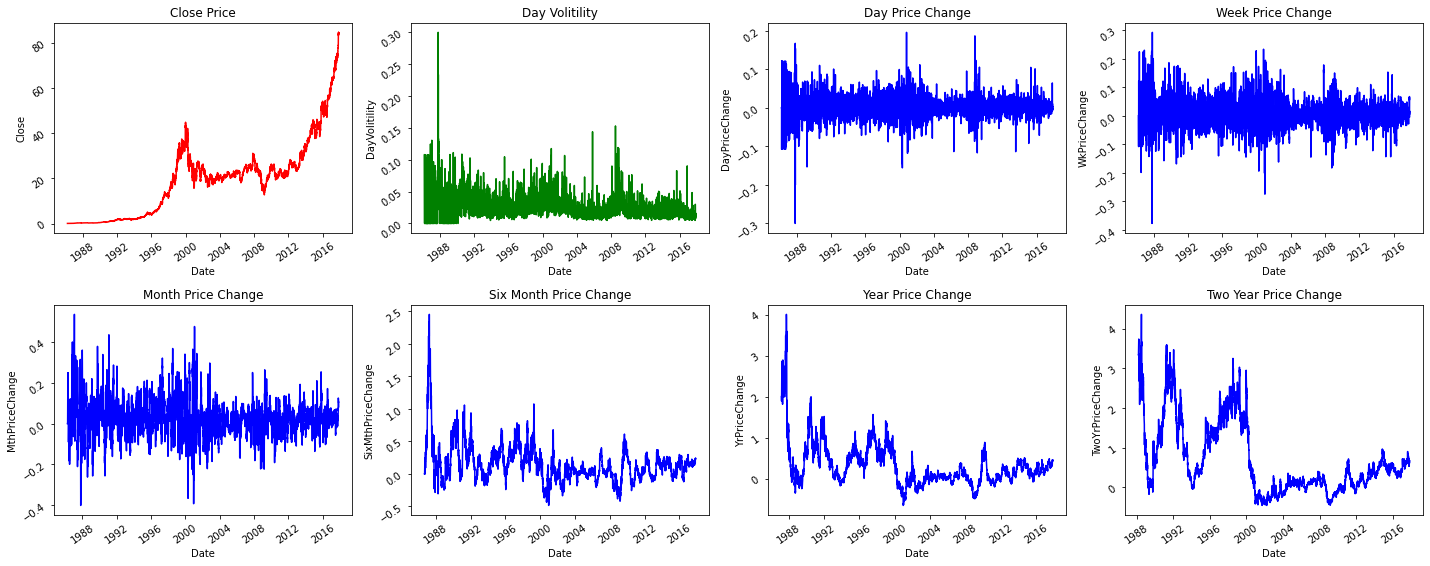

In [89]:
#Multi-data Charts

fig,ax =  plt.subplots( 2, 4,
                       figsize = ( 20, 8))
#0,0
sns.lineplot( x = "Date", y = "Close", 
             color = 'r', data = dataProcessed,
             ax = ax[0][0]).set(title = 'Close Price')

  
ax[0][0].tick_params(labelrotation = 35)
#0,1
sns.lineplot( x = "Date", y = "DayVolitility", 
             color = 'g', data = dataProcessed,
             ax = ax[0][1]).set(title = 'Day Volitility')
  
ax[0][1].tick_params(labelrotation = 35)
#0,2
sns.lineplot(x = "Date", y = "DayPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[0][2]).set(title = 'Day Price Change')
  
ax[0][2].tick_params(labelrotation = 35)
#0,3
sns.lineplot(x = "Date", y = "WkPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[0][3]).set(title = 'Week Price Change')
  
ax[0][3].tick_params(labelrotation = 35)
#1,0
sns.lineplot(x = "Date", y = "MthPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[1][0]).set(title = 'Month Price Change')
  
ax[1][0].tick_params(labelrotation = 35)
#1,1
sns.lineplot(x = "Date", y = "SixMthPriceChange", 
             color = 'b', data = dataProcessed, 
             ax = ax[1][1]).set(title = 'Six Month Price Change')
  
ax[1][1].tick_params(labelrotation = 35)
#1,2
sns.lineplot(x = "Date", y = "YrPriceChange", 
             color = 'b', data = dataProcessed, 
             ax = ax[1][2]).set(title = 'Year Price Change')
  
ax[1][2].tick_params(labelrotation = 35)
#1,3
sns.lineplot(x = "Date", y = "TwoYrPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[1][3]).set(title = 'Two Year Price Change')
  
ax[1][3].tick_params(labelrotation = 35)
fig.tight_layout(pad = 1.2)

In [90]:
dataProcessed.describe()

Close        Volume  DayVolitility  DayPriceChange  \
count  7983.000000  7.983000e+03    7983.000000     7983.000000   
mean     18.984698  7.945800e+07       0.025434        0.001142   
std      16.424012  5.214889e+07       0.017461        0.022890   
min       0.067200  0.000000e+00      -0.000000       -0.300080   
25%       2.113300  4.910587e+07       0.014243       -0.008923   
50%      20.469000  7.059385e+07       0.021715        0.000000   
75%      25.483500  9.734927e+07       0.031311        0.010833   
max      84.560000  1.371331e+09       0.300080        0.195347   

       WkPriceChange  MthPriceChange  SixMthPriceChange  YrPriceChange  \
count    7726.000000     7703.000000        7592.000000    7593.000000   
mean        0.005382        0.021439           0.146373       0.314647   
std         0.047048        0.091930           0.292387       0.512763   
min        -0.377654       -0.400256          -0.485587      -0.646927   
25%        -0.019414       -0.031600          -0.022150      -0.005819   
50%         0.002400        0.017464           0.102881       0.175516   
75%         0.028535        0.068074           0.249955       0.521076   
max         0.292267        0.534623           2.451878       4.009027   

       TwoYrPriceChange  FutWkPriceChange  FutMthPriceChange  \
count       7304.000000       7731.000000        7723.000000   
mean           0.687783          0.005379           0.021292   
std            0.897729          0.047033           0.091788   
min           -0.458644         -0.377654          -0.400256   
25%            0.055309         -0.019382          -0.031485   
50%            0.360344          0.002378           0.017064   
75%            1.264569          0.028520           0.067573   
max            4.365030          0.292267           0.534623   

       FutSixMthPriceChange  FutYrPriceChange  FutTwoYrPriceChange  
count           6300.000000       7845.000000          7812.000000  
mean               0.142481          0.299469             0.625646  
std                0.292311          0.508684             0.890644  
min               -0.461538         -0.646927            -0.458644  
25%               -0.020236          0.000000             0.000000  
50%                0.092376          0.147084             0.262583  
75%                0.243917          0.506478             1.159668  
max                2.451878          4.009027             4.365030

In [91]:
#Array Prototype:
#0:collumn High Total
#1:collumn High Count
#2:collumn Low Total
#3:collumn Low Count
#4:collumn Zero Count
#5:collumn Count (accounting for None values)

#0:row Day Change (7 in dataProcessed)
#1:row Week Change (8 in dataProcessed)
#2:row Month Change (9 in dataProcessed)
#3:row 6Month Change (10 in dataProcessed)
#4:row Year Change (11 in dataProcessed)
#5:row 2Year Change (12 in dataProcessed)


Change = [[0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0]]

index = 0
dataIndex = -1
while nextValue == 1 and index <= len(dataProcessed.index) - 1:
    
    
    #DayChange
    SourceDataCol = 4
    DataRow = 0
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
    
    #WeekChange
    SourceDataCol = 5
    DataRow = 1
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
        
    #MonthChange
    SourceDataCol = 6
    DataRow = 2
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
    #6MonthChange
    SourceDataCol = 7
    DataRow = 3
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
    #YearChange
    SourceDataCol = 8
    DataRow = 4
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
    #2YearChange
    SourceDataCol = 9
    DataRow = 5
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
    
    
    
    
    
    index += 1
        
print(Change)


[[64.21454929439318, 3680, -55.09879119526352, 3517, 786, 7983], [149.47187975946082, 4031, -107.89148356020878, 3303, 649, 7983], [348.69230946346187, 4545, -183.55138248544677, 2995, 443, 7983], [1369.8191542230272, 5278, -258.5523392574895, 2256, 449, 7983], [2667.719870279979, 5606, -278.6020638970752, 1939, 438, 7983], [5310.563174518989, 5855, -286.9937569293734, 1431, 697, 7983]]


In [92]:
Change

[[64.21454929439318, 3680, -55.09879119526352, 3517, 786, 7983],
 [149.47187975946082, 4031, -107.89148356020878, 3303, 649, 7983],
 [348.69230946346187, 4545, -183.55138248544677, 2995, 443, 7983],
 [1369.8191542230272, 5278, -258.5523392574895, 2256, 449, 7983],
 [2667.719870279979, 5606, -278.6020638970752, 1939, 438, 7983],
 [5310.563174518989, 5855, -286.9937569293734, 1431, 697, 7983]]

In [93]:
DataRow = 0
print("======================================================================")
print("Positive Day Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Day Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Day Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 1
print("Positive Week Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Week Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Week Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 2
print("Positive Month Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Month Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Month Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 3
print("Positive 6 Month Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative 6 Month Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) 6 Month Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 4
print("Positive Year Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Year Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Year Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 5
print("Positive 2 Year Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative 2 Year Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) 2 Year Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("======================================================================")

Positive Day Average: 1.745%
Negative Day Average: -1.5666%
(Positive/Neutral/Negative) Day Probability (46.098%/9.8459%/44.0561%)
----------------------------------------------------------------------
Positive Week Average: 3.7081%
Negative Week Average: -3.2665%
(Positive/Neutral/Negative) Week Probability (50.4948%/8.1298%/41.3754%)
----------------------------------------------------------------------
Positive Month Average: 7.672%
Negative Month Average: -6.1286%
(Positive/Neutral/Negative) Month Probability (56.9335%/5.5493%/37.5172%)
----------------------------------------------------------------------
Positive 6 Month Average: 25.9534%
Negative 6 Month Average: -11.4607%
(Positive/Neutral/Negative) 6 Month Probability (66.1155%/5.6245%/28.2601%)
----------------------------------------------------------------------
Positive Year Average: 47.5869%
Negative Year Average: -14.3683%
(Positive/Neutral/Negative) Year Probability (70.2242%/5.4867%/24.2891%)
--------------------------

In [94]:
#Check To see if data has unique Characteristics

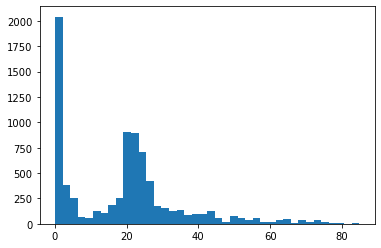

In [95]:
ax = plt.hist(read.Open, bins = 40)

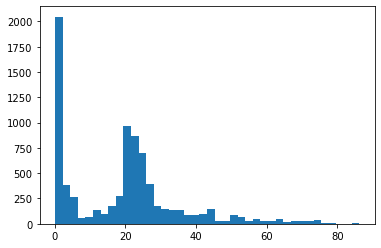

In [96]:
ax = plt.hist(read.High, bins = 40)

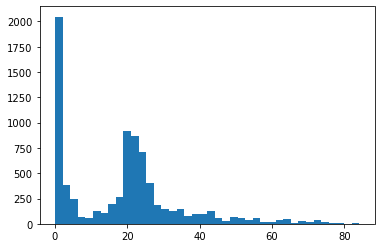

In [97]:
ax = plt.hist(read.Low, bins = 40)

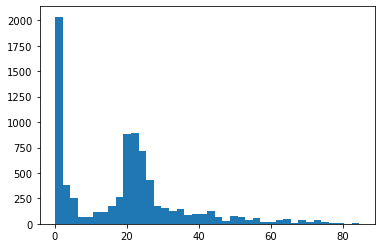

In [98]:
ax = plt.hist(read.Close, bins = 40)

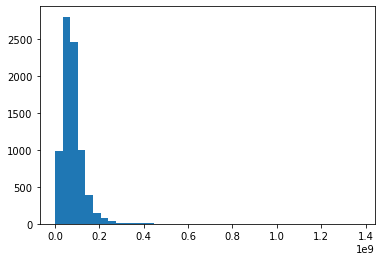

In [99]:
ax = plt.hist(read.Volume, bins = 40)

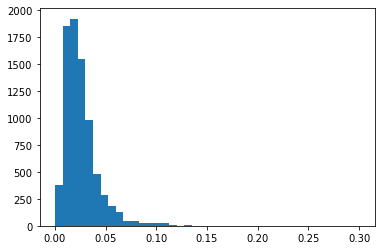

In [100]:
ax = plt.hist(read.DayVolitility, bins = 40)

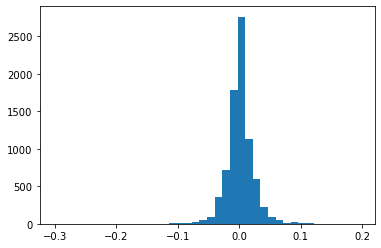

In [101]:
ax = plt.hist(read.DayPriceChange, bins = 40)

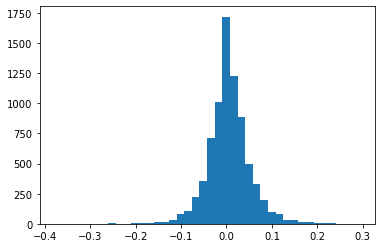

In [102]:
ax = plt.hist(read.WkPriceChange, bins = 40)

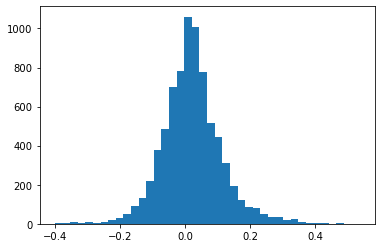

In [103]:
ax = plt.hist(read.MthPriceChange, bins = 40)

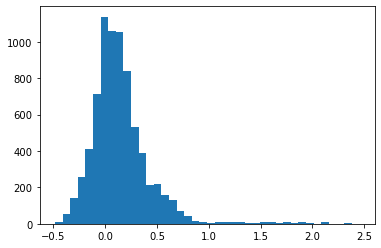

In [104]:
ax = plt.hist(read.SixMthPriceChange, bins = 40)

Text(0.5, 1.0, 'Frequency Of Annual Price Changes')

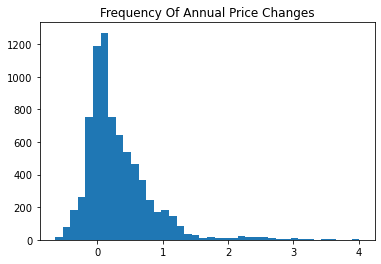

In [105]:
ax = plt.hist(read.YrPriceChange, bins = 40)
plt.title('Frequency Of Annual Price Changes')

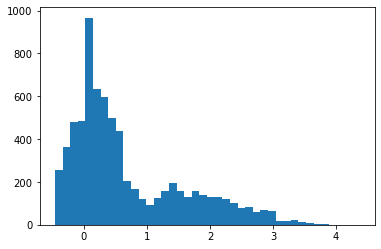

In [106]:
ax = plt.hist(read.TwoYrPriceChange, bins = 40)

In [107]:
#Data Collumns added retroactively:
#Future 1 year change
#Future 2 year change

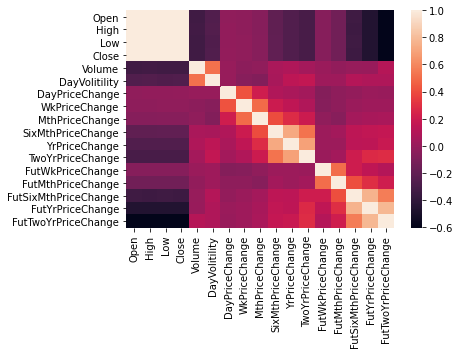

In [108]:
sns.heatmap(read.corr())
plt.show()

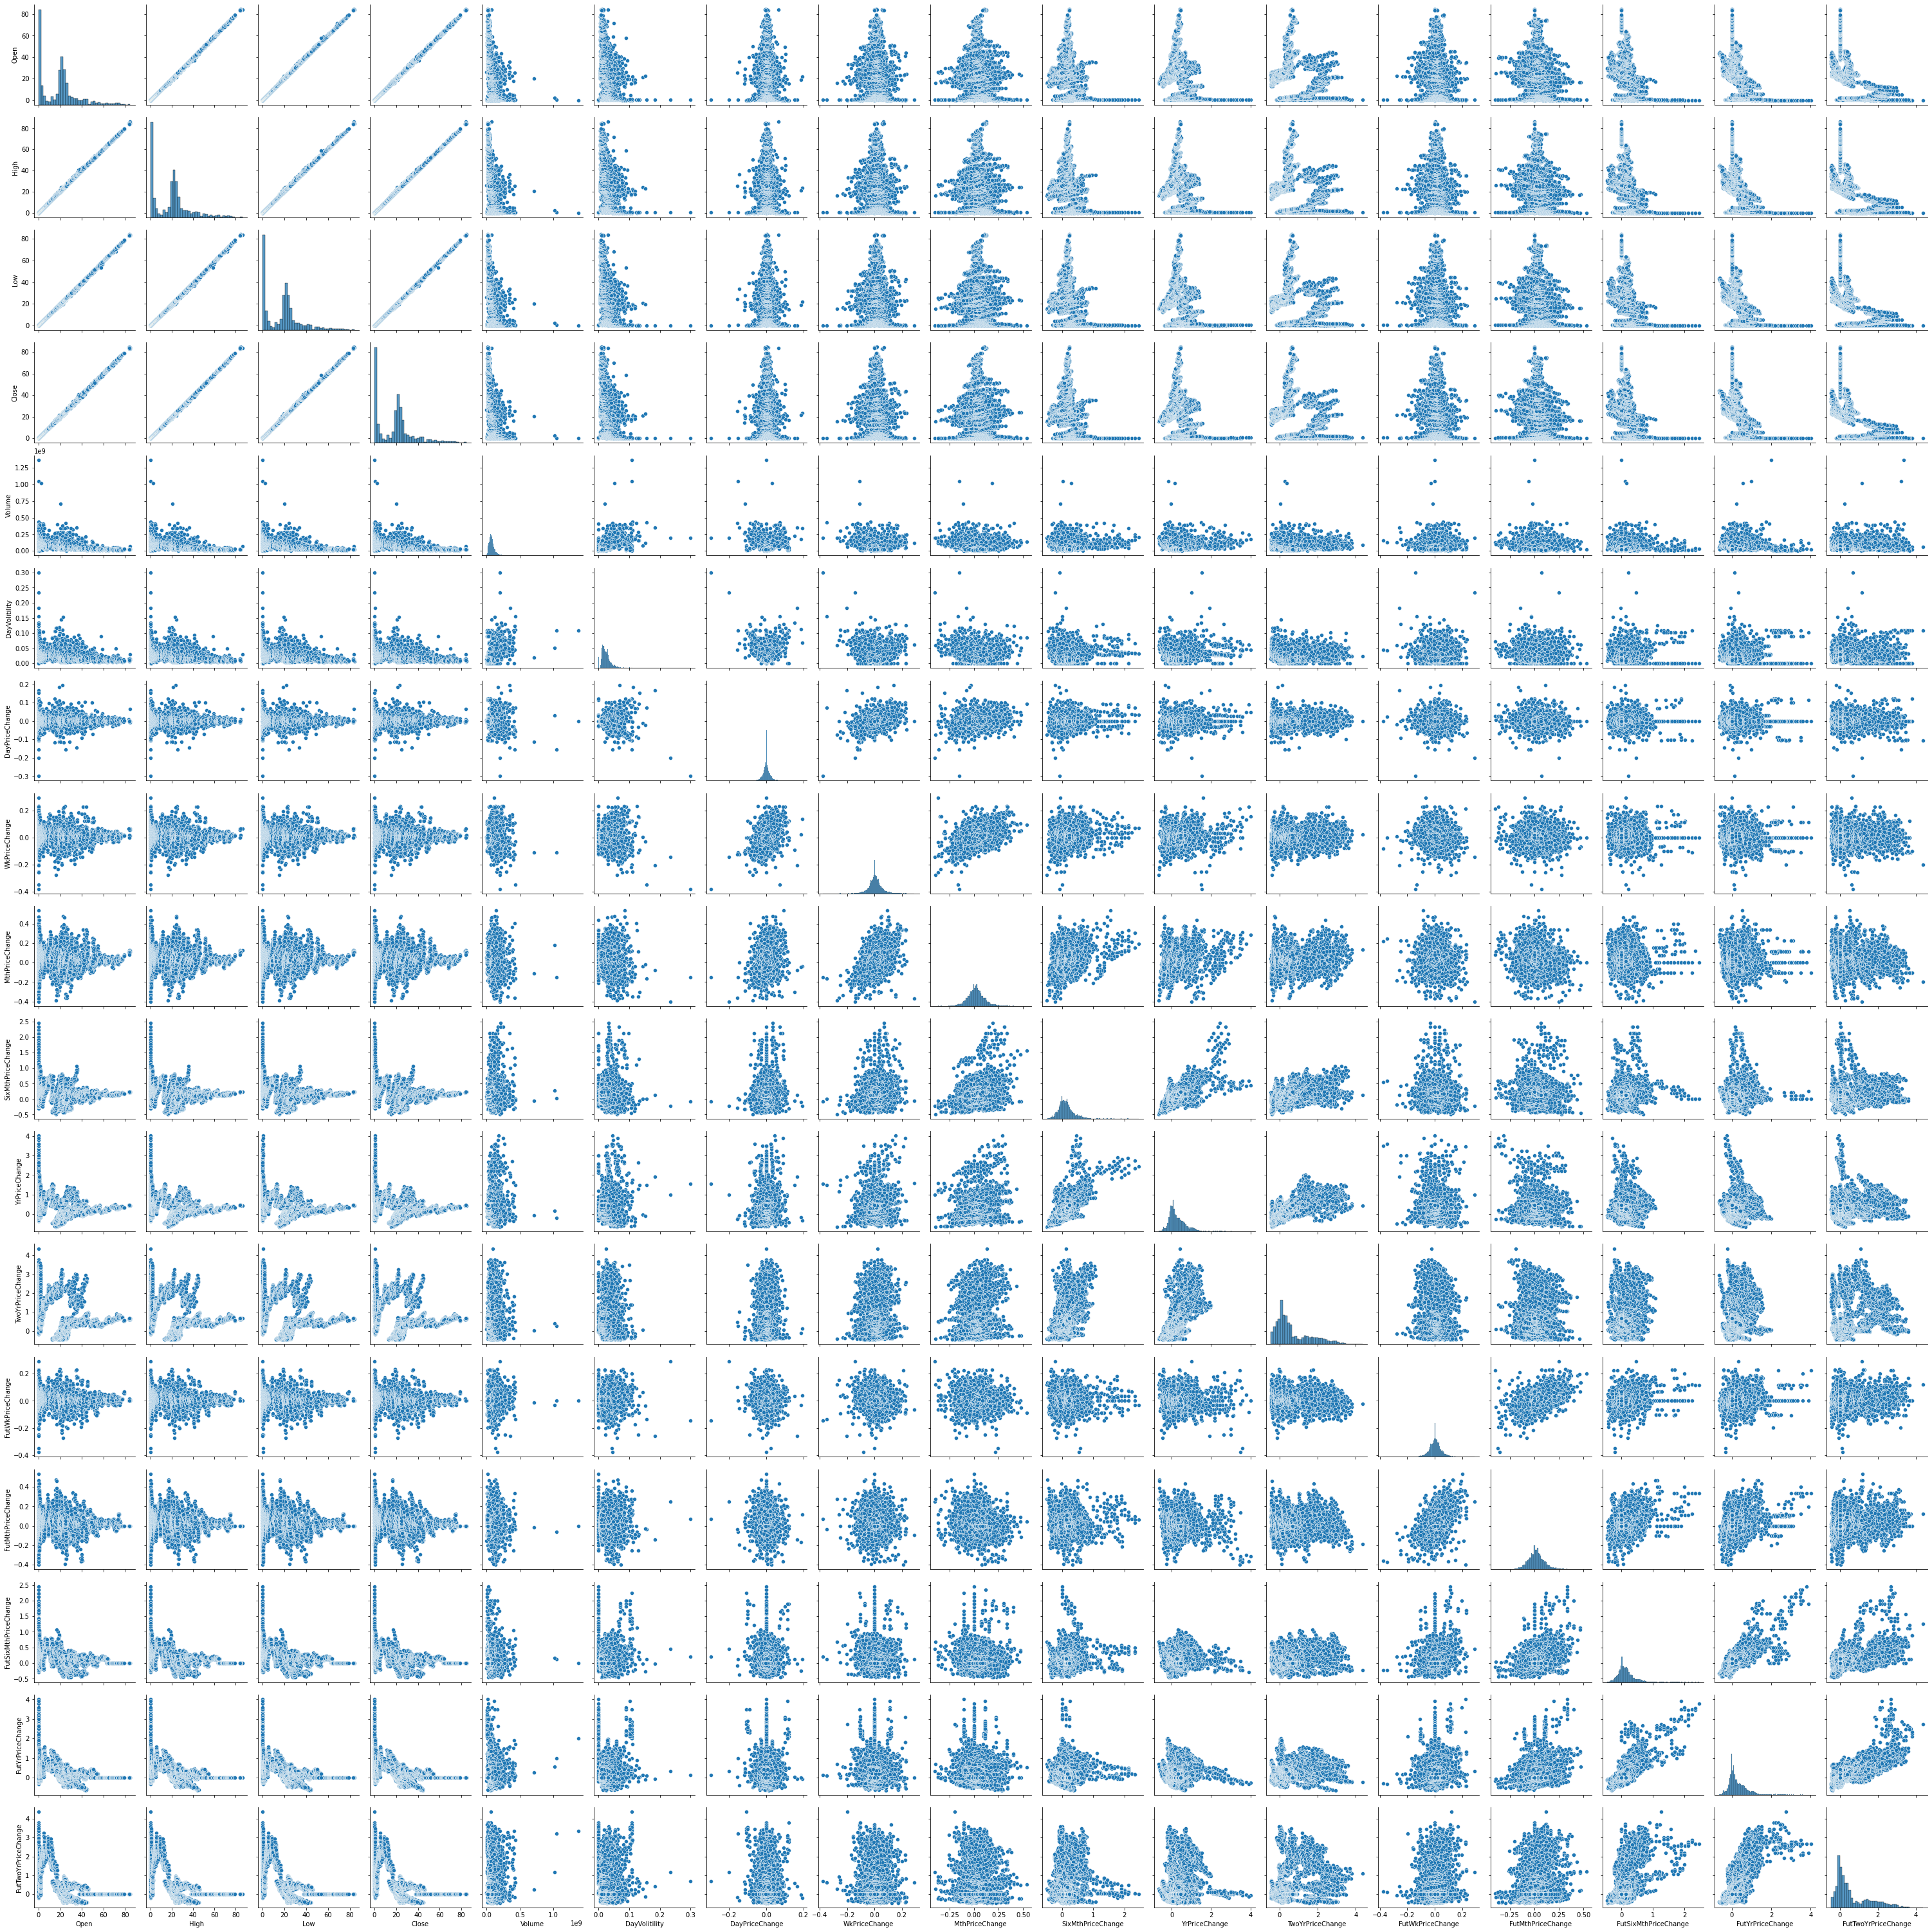

In [109]:

sns.pairplot(read)
plt.show()

In [110]:
#cut off last 2 years of data
read = read[read.FutTwoYrPriceChange != 0]
read = read.dropna()

In [111]:
#find the normalized value for 0

max_value = read['FutTwoYrPriceChange'].max()
min_value = read['FutTwoYrPriceChange'].min()
ZeroSplit = (0 - min_value) / (max_value - min_value)
ZeroSplit

0.11275953855207332

In [112]:

def normalize(df):
    result = df.copy()
    dataTypes = df.dtypes
    for feature_name in df.columns:
        if('int' in str(dataTypes[feature_name]) or 'float' in str(dataTypes[feature_name])):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            result[feature_name] = df[feature_name]
    return result

read=normalize(read)

read

Date      Open      High       Low     Close    Volume  \
504  1988-03-10  0.002028  0.002198  0.002036  0.001833  0.124192   
507  1988-03-15  0.002028  0.002016  0.002036  0.001833  0.055487   
508  1988-03-16  0.001839  0.002016  0.002036  0.002021  0.069162   
509  1988-03-17  0.002210  0.002198  0.002225  0.002021  0.158883   
511  1988-03-21  0.001289  0.001466  0.001299  0.001469  0.251963   
...         ...       ...       ...       ...       ...       ...   
7246 2014-12-10  0.968299  0.964605  0.956089  0.951090  0.031168   
7247 2014-12-11  0.958039  0.966243  0.955669  0.956629  0.029764   
7249 2014-12-15  0.960500  0.964823  0.952995  0.946405  0.029955   
7250 2014-12-16  0.933917  0.937752  0.923801  0.915645  0.048921   
7251 2014-12-17  0.916518  0.929625  0.919072  0.927445  0.035816   

      DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
504        0.412061        0.371219       0.592520        0.631885   
507        0.214385        0.371219       0.490863        0.556734   
508        0.214385        0.518546       0.541131        0.590018   
509        0.202857        0.443929       0.592717        0.590018   
511        0.452216        0.523223       0.393376        0.459521   
...             ...             ...            ...             ...   
7246       0.169026        0.402575       0.492923        0.421424   
7247       0.186483        0.460415       0.473906        0.408935   
7249       0.197341        0.426940       0.499044        0.400380   
7250       0.218951        0.351927       0.440666        0.373412   
7251       0.189864        0.480403       0.492478        0.399240   

      SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
504            0.364419       0.412190          0.787464          0.592717   
507            0.345606       0.432927          0.787464          0.491050   
508            0.382615       0.406393          0.811056          0.393376   
509            0.382615       0.406393          0.811056          0.295303   
511            0.389057       0.365866          0.845061          0.435097   
...                 ...            ...               ...               ...   
7246           0.415312       0.350652          0.265395          0.492478   
7247           0.424786       0.358519          0.269384          0.555643   
7249           0.400204       0.357788          0.265594          0.596362   
7250           0.373571       0.346607          0.247172          0.684474   
7251           0.383104       0.351966          0.255055          0.644415   

      FutMthPriceChange  FutSixMthPriceChange  FutYrPriceChange  \
504            0.381555              0.218020          0.176685   
507            0.350800              0.218020          0.186403   
508            0.353014              0.187278          0.159418   
509            0.262239              0.170886          0.168764   
511            0.375619              0.231065          0.162721   
...                 ...                   ...               ...   
7246           0.456935              0.304257          0.321566   
7247           0.484959              0.293898          0.321328   
7249           0.472409              0.298853          0.325136   
7250           0.505975              0.322648          0.340962   
7251           0.479985              0.324963          0.342862   

      FutTwoYrPriceChange  
504              0.283763  
507              0.283763  
508              0.279050  
509              0.291469  
511              0.352764  
...                   ...  
7246             0.206707  
7247             0.202754  
7249             0.212841  
7250             0.229084  
7251             0.222850  

[4340 rows x 18 columns]

In [113]:
#Future is above average:
#Future 2 year: column 17
countAboveAvg = 0
countBelowAvg = 0
index = 0
FutAboveAverage = [None] * len(read.index)
Average = read['FutTwoYrPriceChange'].mean()
while (index < len(read)):
    if(read.iloc[index, 17] > Average):
        FutAboveAverage[index] = True
        countAboveAvg += 1
    elif(read.iloc[index, 17] <= Average):
        FutAboveAverage[index] = False
        countBelowAvg += 1
    else:
        FutAboveAverage[index] = None
    
    index += 1
read['FutAboveAverage'] = FutAboveAverage

In [114]:
#Future is positive
#Future 2 year: column 17
#using ZeroSplit as an ajusted 0 value relative to the normalization

countAbove = 0
countBelow = 0
index = 0
FutPositive = [None] * len(read.index)
while (index < len(read)):
    if(read.iloc[index, 17] > ZeroSplit):
        FutPositive[index] = True
        countAbove += 1
    elif(read.iloc[index, 17] <= ZeroSplit):
        FutPositive[index] = False
        countBelow += 1
    else:
        FutPositive[index] = None
    
    index += 1
read['FutPositive'] = FutPositive

In [115]:
print(Average)

0.2756193223977876


In [116]:
read.groupby('FutAboveAverage').size()

FutAboveAverage
False    2907
True     1433
dtype: int64

In [117]:
read.groupby('FutPositive').size()

FutPositive
False     915
True     3425
dtype: int64

In [118]:
read

Date      Open      High       Low     Close    Volume  \
504  1988-03-10  0.002028  0.002198  0.002036  0.001833  0.124192   
507  1988-03-15  0.002028  0.002016  0.002036  0.001833  0.055487   
508  1988-03-16  0.001839  0.002016  0.002036  0.002021  0.069162   
509  1988-03-17  0.002210  0.002198  0.002225  0.002021  0.158883   
511  1988-03-21  0.001289  0.001466  0.001299  0.001469  0.251963   
...         ...       ...       ...       ...       ...       ...   
7246 2014-12-10  0.968299  0.964605  0.956089  0.951090  0.031168   
7247 2014-12-11  0.958039  0.966243  0.955669  0.956629  0.029764   
7249 2014-12-15  0.960500  0.964823  0.952995  0.946405  0.029955   
7250 2014-12-16  0.933917  0.937752  0.923801  0.915645  0.048921   
7251 2014-12-17  0.916518  0.929625  0.919072  0.927445  0.035816   

      DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
504        0.412061        0.371219       0.592520        0.631885   
507        0.214385        0.371219       0.490863        0.556734   
508        0.214385        0.518546       0.541131        0.590018   
509        0.202857        0.443929       0.592717        0.590018   
511        0.452216        0.523223       0.393376        0.459521   
...             ...             ...            ...             ...   
7246       0.169026        0.402575       0.492923        0.421424   
7247       0.186483        0.460415       0.473906        0.408935   
7249       0.197341        0.426940       0.499044        0.400380   
7250       0.218951        0.351927       0.440666        0.373412   
7251       0.189864        0.480403       0.492478        0.399240   

      SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
504            0.364419       0.412190          0.787464          0.592717   
507            0.345606       0.432927          0.787464          0.491050   
508            0.382615       0.406393          0.811056          0.393376   
509            0.382615       0.406393          0.811056          0.295303   
511            0.389057       0.365866          0.845061          0.435097   
...                 ...            ...               ...               ...   
7246           0.415312       0.350652          0.265395          0.492478   
7247           0.424786       0.358519          0.269384          0.555643   
7249           0.400204       0.357788          0.265594          0.596362   
7250           0.373571       0.346607          0.247172          0.684474   
7251           0.383104       0.351966          0.255055          0.644415   

      FutMthPriceChange  FutSixMthPriceChange  FutYrPriceChange  \
504            0.381555              0.218020          0.176685   
507            0.350800              0.218020          0.186403   
508            0.353014              0.187278          0.159418   
509            0.262239              0.170886          0.168764   
511            0.375619              0.231065          0.162721   
...                 ...                   ...               ...   
7246           0.456935              0.304257          0.321566   
7247           0.484959              0.293898          0.321328   
7249           0.472409              0.298853          0.325136   
7250           0.505975              0.322648          0.340962   
7251           0.479985              0.324963          0.342862   

      FutTwoYrPriceChange  FutAboveAverage  FutPositive  
504              0.283763             True         True  
507              0.283763             True         True  
508              0.279050             True         True  
509              0.291469             True         True  
511              0.352764             True         True  
...                   ...              ...          ...  
7246             0.206707            False         True  
7247             0.202754            False         True  
7249             0.212841            False         True  
7250             0.

In [119]:
#Cut out other prediction collumns
data_baseline = read.drop(['Date', 'Open', 'High', 'Low', 'Close', 'FutWkPriceChange', 'FutMthPriceChange', 'FutSixMthPriceChange', 'FutYrPriceChange', 'FutTwoYrPriceChange'],  axis=1)
#data_baseline = read.drop(['Date', 'FutWkPriceChange', 'FutMthPriceChange', 'FutSixMthPriceChange', 'FutYrPriceChange', 'FutTwoYrPriceChange'],  axis=1)

In [120]:
data_baseline

Volume  DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
504   0.124192       0.412061        0.371219       0.592520        0.631885   
507   0.055487       0.214385        0.371219       0.490863        0.556734   
508   0.069162       0.214385        0.518546       0.541131        0.590018   
509   0.158883       0.202857        0.443929       0.592717        0.590018   
511   0.251963       0.452216        0.523223       0.393376        0.459521   
...        ...            ...             ...            ...             ...   
7246  0.031168       0.169026        0.402575       0.492923        0.421424   
7247  0.029764       0.186483        0.460415       0.473906        0.408935   
7249  0.029955       0.197341        0.426940       0.499044        0.400380   
7250  0.048921       0.218951        0.351927       0.440666        0.373412   
7251  0.035816       0.189864        0.480403       0.492478        0.399240   

      SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutAboveAverage  \
504            0.364419       0.412190          0.787464             True   
507            0.345606       0.432927          0.787464             True   
508            0.382615       0.406393          0.811056             True   
509            0.382615       0.406393          0.811056             True   
511            0.389057       0.365866          0.845061             True   
...                 ...            ...               ...              ...   
7246           0.415312       0.350652          0.265395            False   
7247           0.424786       0.358519          0.269384            False   
7249           0.400204       0.357788          0.265594            False   
7250           0.373571       0.346607          0.247172            False   
7251           0.383104       0.351966          0.255055            False   

      FutPositive  
504          True  
507          True  
508          True  
509          True  
511          True  
...           ...  
7246         True  
7247         True  
7249         True  
7250         True  
7251         True  

[4340 rows x 10 columns]

In [121]:
#Get Source Data isolated
x_data = data_baseline.drop(['FutPositive', 'FutAboveAverage'], axis=1)
x_data = x_data.values

In [129]:
#######Future Above Average################

In [130]:
#Get Target Data Isolated

y_data = data_baseline[['FutAboveAverage']]
y_data = y_data.values.flatten()


In [131]:
#Split Test Sets
#85/15
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


In [132]:
#Run Model for Above Average
modelLogReg = LogisticRegression(solver='liblinear')
modelLogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [133]:
#Analyse Model for Above Average
y_pred = modelLogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelLogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[383  65]
 [121  82]]


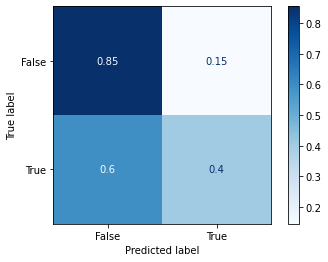

In [135]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelLogReg, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.85      0.80       448
        True       0.56      0.40      0.47       203

    accuracy                           0.71       651
   macro avg       0.66      0.63      0.64       651
weighted avg       0.70      0.71      0.70       651



In [162]:
modelLogReg.coef_

array([[ 0.85841473, -2.17876775,  0.27132276, -0.36556869, -0.24292984,
         0.18872634,  0.39153607,  1.40373486]])

In [137]:
#Try Decision Tree

In [138]:
#Run Model for Above Average
modelDTree = tree.DecisionTreeClassifier(criterion='entropy')
modelDTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [139]:
#Analyse Model for Above Average
y_pred = modelDTree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelDTree.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


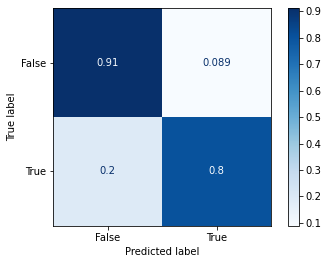

In [140]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelDTree, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.91      0.91       448
        True       0.80      0.80      0.80       203

    accuracy                           0.88       651
   macro avg       0.86      0.86      0.86       651
weighted avg       0.88      0.88      0.88       651



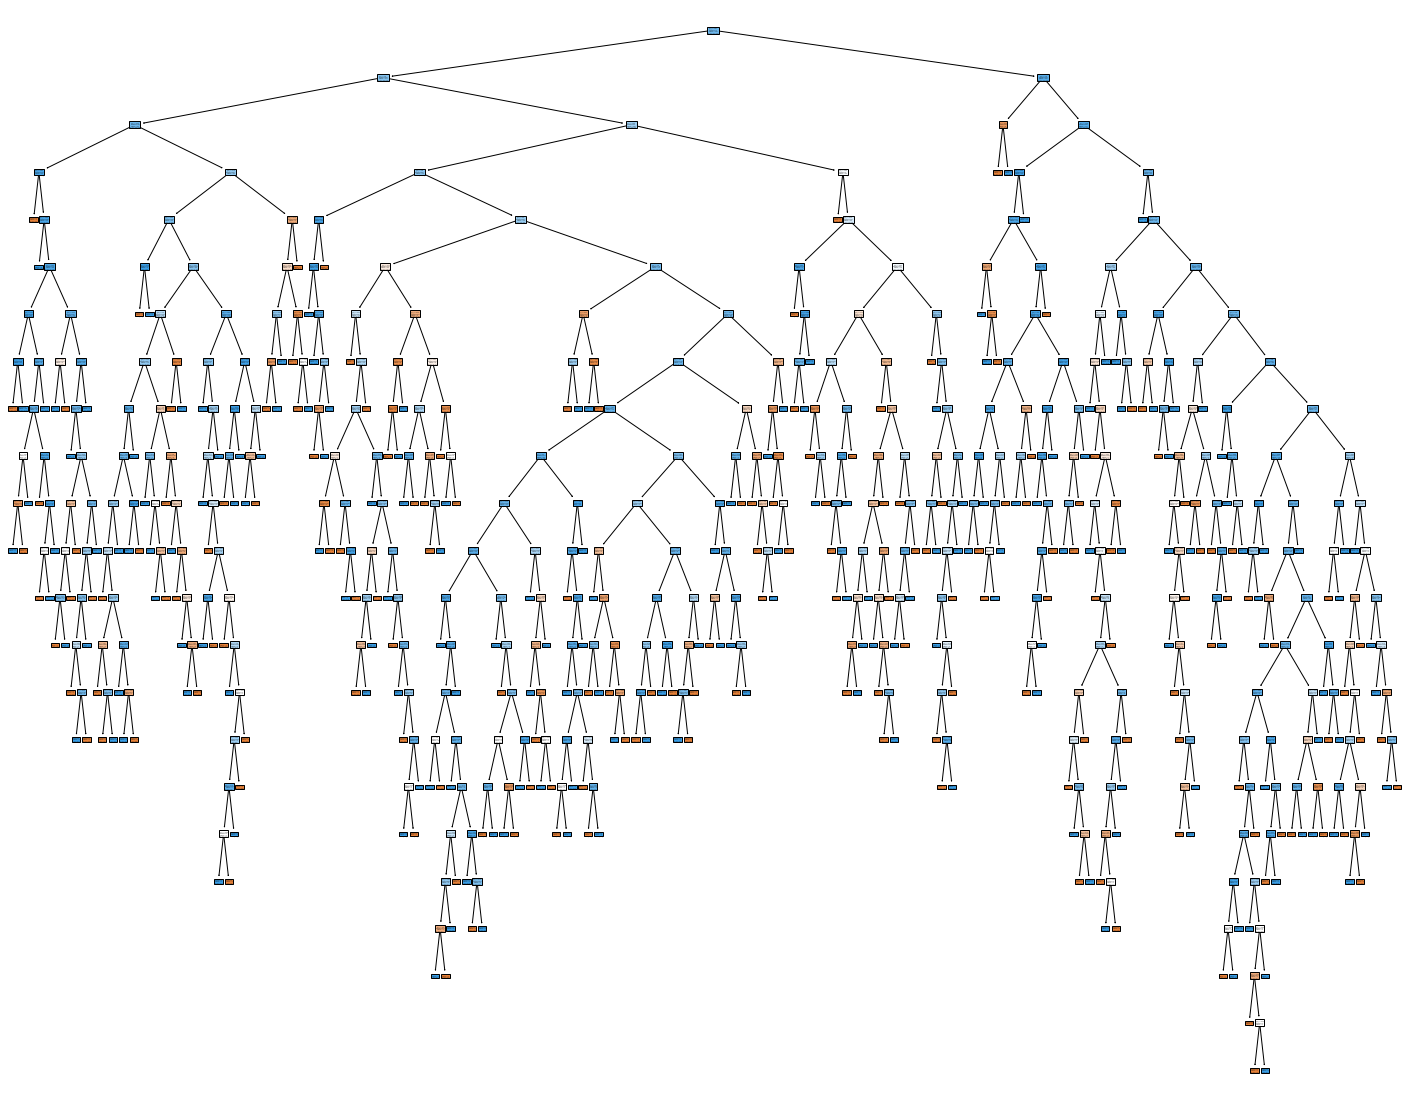

In [167]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelDTree, 
                   #feature_names=read.feature_names,  
                   #class_names=read.target_names,
                   filled=True)

In [170]:
text_representation = tree.export_text(modelDTree)
print(text_representation)

|--- feature_7 <= 0.16
|   |--- feature_1 <= 0.15
|   |   |--- feature_6 <= 0.26
|   |   |   |--- feature_5 <= 0.17
|   |   |   |   |--- class: False
|   |   |   |--- feature_5 >  0.17
|   |   |   |   |--- feature_1 <= 0.09
|   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_1 >  0.09
|   |   |   |   |   |--- feature_7 <= 0.10
|   |   |   |   |   |   |--- feature_4 <= 0.49
|   |   |   |   |   |   |   |--- feature_7 <= 0.02
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- feature_7 >  0.02
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- feature_4 >  0.49
|   |   |   |   |   |   |   |--- feature_7 <= 0.09
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.52
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.59
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  0.16
|   |   | 

In [142]:
ModelRandoClass = RandomForestClassifier()
ModelRandoClass.fit(X_train, y_train)

y_pred_rf = ModelRandoClass.predict(X_test)

In [143]:
ModelRandoClass.score(X_test,y_test)

0.9062980030721967

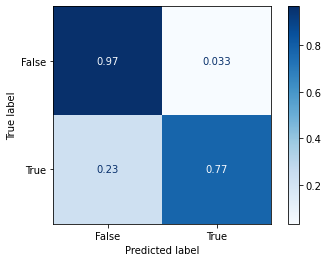

In [144]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(ModelRandoClass, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [145]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93       448
        True       0.91      0.77      0.84       203

    accuracy                           0.91       651
   macro avg       0.91      0.87      0.89       651
weighted avg       0.91      0.91      0.90       651



AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

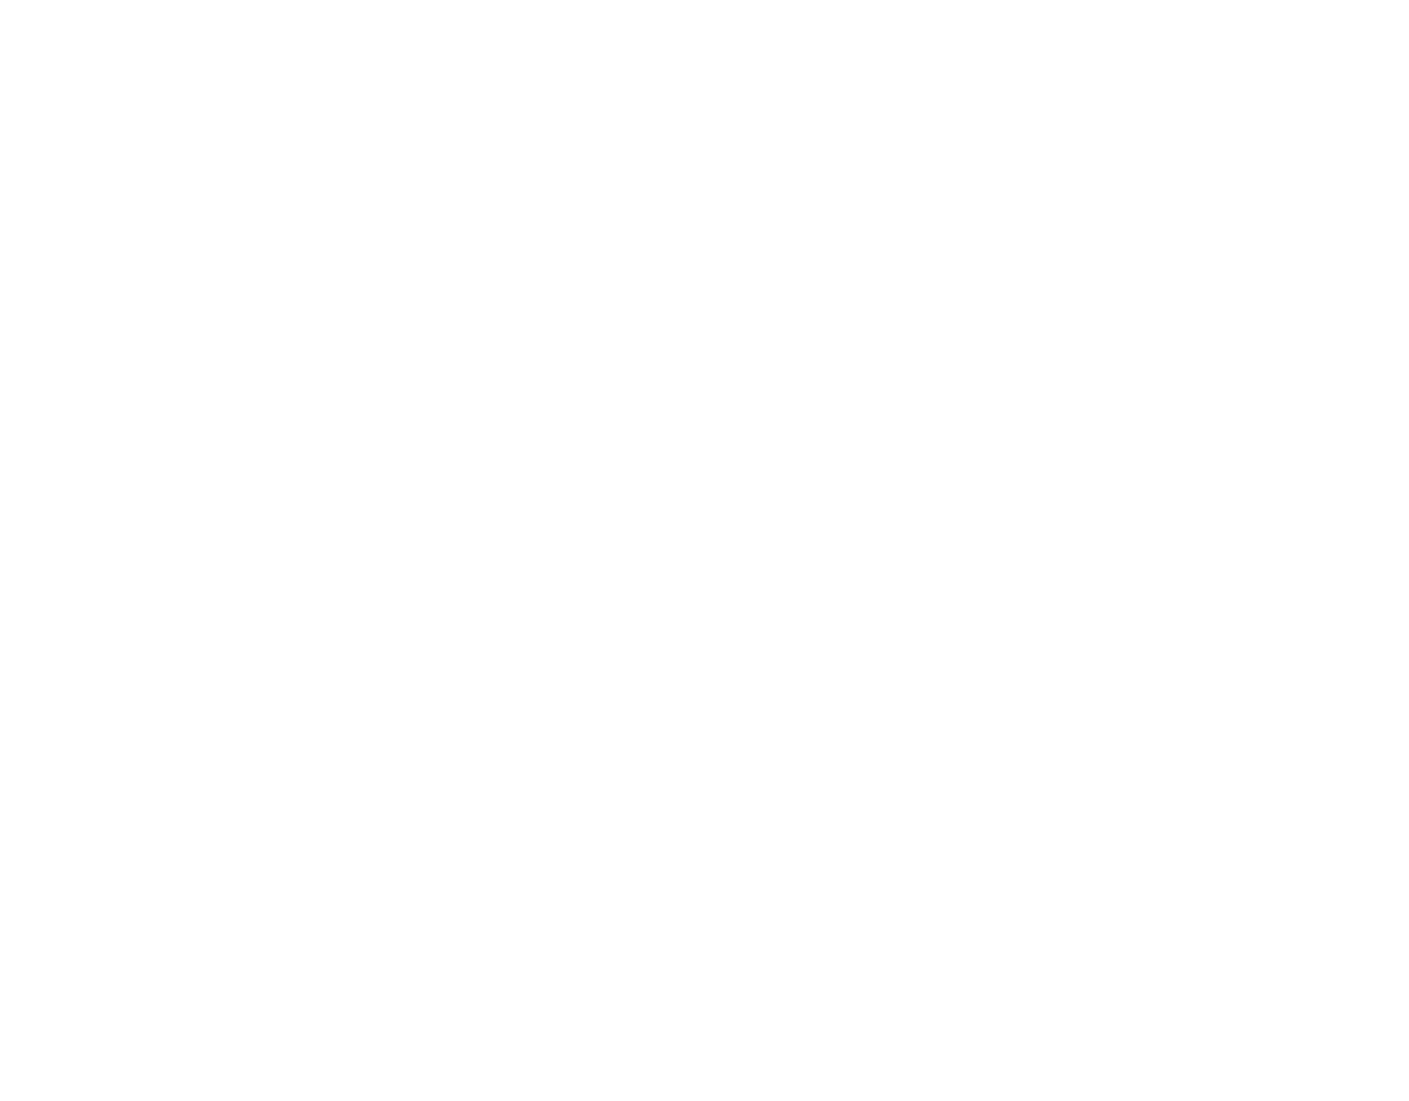

In [169]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ModelRandoClass, 
                   #feature_names=read.feature_names,  
                   #class_names=read.target_names,
                   filled=True)

In [146]:
######################Future Positive###################################

In [147]:
#Get Target Data Isolated
y_data = data_baseline[['FutPositive']]
y_data = y_data.values.flatten()

In [148]:
#Split Test Sets
#85/15
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [149]:
#Run Model for Above Average
modelLogReg = LogisticRegression(solver='liblinear')
modelLogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [150]:
#Analyse Model for Above Average
y_pred = modelLogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelLogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


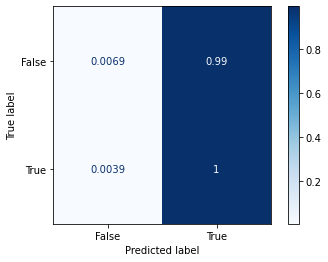

In [151]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelLogReg, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.33      0.01      0.01       144
        True       0.78      1.00      0.87       507

    accuracy                           0.78       651
   macro avg       0.56      0.50      0.44       651
weighted avg       0.68      0.78      0.68       651



In [163]:
modelLogReg.coef_

array([[ 0.85841473, -2.17876775,  0.27132276, -0.36556869, -0.24292984,
         0.18872634,  0.39153607,  1.40373486]])

In [153]:
#Try Decision Tree

In [154]:
#Run Model for Above Average
modelDTree = tree.DecisionTreeClassifier(criterion='entropy')
modelDTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [155]:
#Analyse Model for Above Average
y_pred = modelDTree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelDTree.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


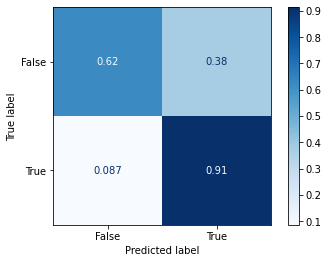

In [156]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelDTree, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.67      0.62      0.65       144
        True       0.90      0.91      0.90       507

    accuracy                           0.85       651
   macro avg       0.78      0.77      0.78       651
weighted avg       0.85      0.85      0.85       651



In [158]:
ModelRandoClass = RandomForestClassifier()
ModelRandoClass.fit(X_train, y_train)

y_pred_rf = ModelRandoClass.predict(X_test)

In [159]:
ModelRandoClass.score(X_test,y_test)

0.880184331797235

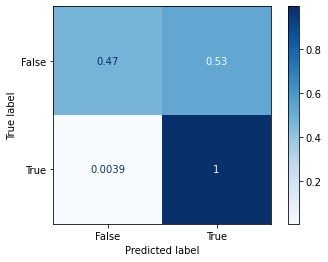

In [160]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(ModelRandoClass, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [161]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.97      0.47      0.64       144
        True       0.87      1.00      0.93       507

    accuracy                           0.88       651
   macro avg       0.92      0.73      0.78       651
weighted avg       0.89      0.88      0.86       651

